In [1]:
"""
read and modify TOF data for antiproton
@aurthor Jiancheng Zeng
@Oct 14 2021
"""

'\nread and modify TOF data for antiproton\n@aurthor Jiancheng Zeng\n@Oct 14 2021\n'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statistics
from numpy import array
import pandas as pd

In [6]:
"""
antiproton analysis
"""
data = []
event = []
identical = []

"""
Read data from total data file
--------------------
"""
print("Reading data ...")
data = pd.read_table("~/GRAMS/Toy Model/data/rawdata/TOF_anti_proton_1e5_0_500_0_4.dat")    #input file
#data = pd.read_table("/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/TOF_anti_proton_1e4_0_500_45_4.dat")

"""
modification
"""
print("Modifing data ...")
for i in range(len(data.iloc[:,0])):
    if(0 <= data.iloc[i,2] <= 1):
        event.append(list(data.iloc[i,:]))
    print("Modifing process:"+str(int(100*i/len(data.iloc[:,0])))+"%", end='\r')
event = np.array(event)
print("\n finished!")

"""
recognize the data file length distribution
"""

print("\n Recognize events ...")
s = 0
for s in range(len(event[:,1])-1):
    if(int(event[s,0]) != int(event[s+1,0])):
        identical.append(s+1)
    print("Recognizing process:"+str(int(100*s/len(event[:,0])))+"%", end='\r')
    #time.sleep(0.001)
selection = np.split(event, identical)
print("Recognizing process finished!\n")
identical.append(len(event))

TOF_out_pbar_E = []
TOF_out_pbar_T = []
TOF_in_pbar_E = []
TOF_in_pbar_T = []
index = []

for i in range(1, len(selection)-1, 1):
    tempout = 0
    tempin = 0
    """
    for j in range(selection[i].shape[0]):
        if(selection[i][j][6] == 'LAr' and selection[i][j][3] == '-2212'):
            for m in range(selection[i].shape[0]):
                if(selection[i][m][5] == '-11000' or selection[i][m][5] == '-11001' or selection[i][m][5] == '-11002' or selection[i][m][5] == '-11003' or selection[i][m][5] == '-11004' or selection[i][m][5] == '-11005' and selection[i][m][3] == '-2212'):
                #if(selection[i][m][5] == '-11004' and selection[i][m][3] == '-2212'):
                    tempin = tempin + float(selection[i][m][9])
                #if(selection[i][m][5] == '-10000' or selection[i][m][5] == '-10001' or selection[i][m][5] == '-10002' or selection[i][m][5] == '-10003' or selection[i][m][5] == '-10004' or selection[i][m][5] == '-10005' and selection[i][m][3] == '-2212'):
                elif(selection[i][m][5] == '-10005' and selection[i][m][3] == '-2212'):
                    tempout = tempout + float(selection[i][m][9])
            TOF_out_pbar_E.append(tempout)
            TOF_in_pbar_E.append(tempin)
            break
    """
    for k in range(selection[i].shape[0]):
        if(selection[i][k][6] == 'LAr' and selection[i][k][3] == '-2212'):
            for m in range(k):
                if(selection[i][m][5] == '-11000' or selection[i][m][5] == '-11001' or selection[i][m][5] == '-11002' or selection[i][m][5] == '-11003' or selection[i][m][5] == '-11004' or selection[i][m][5] == '-11005' and selection[i][m][3] == '-2212'):
                #if(selection[i][m][5] == '-11004' and selection[i][m][3] == '-2212'):
                    tempin = tempin + float(selection[i][m][9])
                #if(selection[i][m][5] == '-10000' or selection[i][m][5] == '-10001' or selection[i][m][5] == '-10002' or selection[i][m][5] == '-10003' or selection[i][m][5] == '-10004' or selection[i][m][5] == '-10005' and selection[i][m][3] == '-2212'):
                if(selection[i][m][5] == '-10000' or selection[i][m][5] == '-10001' or selection[i][m][5] == '-10002' or selection[i][m][5] == '-10003' or selection[i][m][5] == '-10004' or selection[i][m][5] == '-10005' and selection[i][m][3] == '-2212'):
                    tempout = tempout + float(selection[i][m][9])
            if(tempin != 0 and tempout != 0):
                TOF_out_pbar_E.append(tempout)
                TOF_in_pbar_E.append(tempin)
                index.append(selection[i][k][0])
            for o in range(k):
                if(selection[i][o][5] == '-11000' or selection[i][o][5] == '-11001' or selection[i][o][5] == '-11002' or selection[i][o][5] == '-11003' or selection[i][o][5] == '-11004' or selection[i][o][5] == '-11005' and selection[i][o][3] == '-2212'):
#                if(selection[i][o][5] == '-11000' or selection[i][o][5] == '-11005' and selection[i][o][3] == '-2212'):
                    TOF_in_pbar_T.append(selection[i][o][7])
                    break
            for p in range(k):
                if(selection[i][p][5] == '-10000' or selection[i][p][5] == '-10001' or selection[i][p][5] == '-10002' or selection[i][p][5] == '-10003' or selection[i][p][5] == '-10004' or selection[i][p][5] == '-10005' and selection[i][p][3] == '-2212'):
#                if(selection[i][p][5] == '-10000' or selection[i][p][5] == '-10005' and selection[i][p][3] == '-2212'):
                    TOF_out_pbar_T.append(selection[i][p][7])
                    break
            theta = np.arctan((float(selection[i][p][18])-float(selection[i][k][18]))/np.sqrt((float(selection[i][p][17])-float(selection[i][k][17])) ** 2 + (float(selection[i][p][16])-float(selection[i][k][16])) ** 2))
            theta0 = np.arctan((210 - float(selection[i][0][18]))/np.sqrt((float(selection[i][0][17])-0) ** 2 + (float(selection[i][0][16])-0) ** 2))
            if(theta < theta0 - 4 * 0.0174532925 or theta > theta0 + 4 * 0.0174532925 and tempin != 0 and tempout != 0):
                TOF_in_pbar_T.pop()
                TOF_out_pbar_T.pop()
                TOF_out_pbar_E.pop()
                TOF_in_pbar_E.pop() 
                index.pop()
            break
    print("TOF data process:"+str(int(100*i/len(selection)))+"%", end='\r')

print("\n identification:finished!")

Reading data ...
Modifing data ...
Modifing process:99%
 finished!

 Recognize events ...
Recognizing process finished!

TOF data process:99%
 identification:finished!


finished!


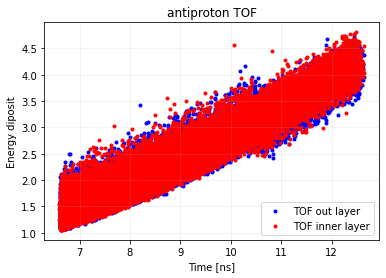

In [7]:
#dE_pbar = array([float(i) for i in TOF_out_pbar_E]) - array([float(i) for i in TOF_in_pbar_E])
time_pbar = array([float(i) for i in TOF_in_pbar_T]) - array([float(i) for i in TOF_out_pbar_T])
dEOut_pbar = array([float(i) for i in TOF_out_pbar_E])
dEIn_pbar = array([float(i) for i in TOF_in_pbar_E])
#plt.scatter(time_pbar, dE_pbar)
anti_proton = np.array([dEOut_pbar, dEIn_pbar, time_pbar]).transpose()
plt.scatter(time_pbar, dEOut_pbar, marker = '.', color = 'b', label = 'TOF out layer')
plt.scatter(time_pbar, dEIn_pbar,marker = '.', color = 'r', label = 'TOF inner layer')
plt.title('antiproton TOF')
plt.xlabel('Time [ns]')
plt.ylabel('Energy diposit')
plt.legend(loc='lower right')
#plt.axis([0, 20, 0, 10])
plt.grid(alpha = 0.2)
#np.savetxt('/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/TOF_anti_proton_1e7_0_500_45_4_result.txt', anti_proton, delimiter = '\t ', fmt='%.6s')
with open("/Users/jiancheng/GRAMS/Toy Model/data/cut/TOF_anti_proton_1e5_0_500_0_4_result.txt", "ab") as f:    #input file
#with open("/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/test.txt", "ab") as f:    #test run
    #f.write(b"\n")
    np.savetxt(f, anti_proton)
print("finished!")

Reading data ...
Modifing data ...
Modifing process:99%
 finished!

 Recognize events ...
Recognizing process finished!

TOF data process:99%
 identification:finished!
finished!


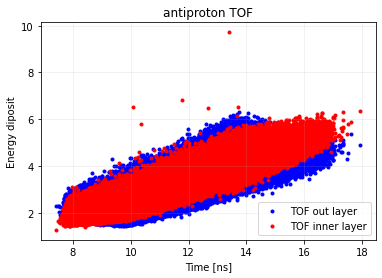

In [3]:
data = []
event = []
identical = []

"""
Read data from total data file
--------------------
"""
print("Reading data ...")
data = pd.read_table("~/CloudDocuments/Documents/GitHub/GRAMS/sensitivity/data/TOF_data/TOF_anti_proton_1e7_0_500_45_4_2.txt")    #input file
#data = pd.read_table("/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/TOF_anti_proton_1e4_0_500_45_4.dat")

"""
modification
"""
print("Modifing data ...")
for i in range(len(data.iloc[:,0])):
    if(0 <= data.iloc[i,2] <= 1):
        event.append(list(data.iloc[i,:]))
    print("Modifing process:"+str(int(100*i/len(data.iloc[:,0])))+"%", end='\r')
event = np.array(event)
print("\n finished!")

"""
recognize the data file length distribution
"""

print("\n Recognize events ...")
s = 0
for s in range(len(event[:,1])-1):
    if(int(event[s,0]) != int(event[s+1,0])):
        identical.append(s+1)
    print("Recognizing process:"+str(int(100*s/len(event[:,0])))+"%", end='\r')
    #time.sleep(0.001)
selection = np.split(event, identical)
print("Recognizing process finished!\n")
identical.append(len(event))

TOF_out_pbar_E = []
TOF_out_pbar_T = []
TOF_in_pbar_E = []
TOF_in_pbar_T = []
index = []

for i in range(1, len(selection)-1, 1):
    tempout = 0
    tempin = 0
    """
    for j in range(selection[i].shape[0]):
        if(selection[i][j][6] == 'LAr' and selection[i][j][3] == '-2212'):
            for m in range(selection[i].shape[0]):
                if(selection[i][m][5] == '-11000' or selection[i][m][5] == '-11001' or selection[i][m][5] == '-11002' or selection[i][m][5] == '-11003' or selection[i][m][5] == '-11004' or selection[i][m][5] == '-11005' and selection[i][m][3] == '-2212'):
                #if(selection[i][m][5] == '-11004' and selection[i][m][3] == '-2212'):
                    tempin = tempin + float(selection[i][m][9])
                #if(selection[i][m][5] == '-10000' or selection[i][m][5] == '-10001' or selection[i][m][5] == '-10002' or selection[i][m][5] == '-10003' or selection[i][m][5] == '-10004' or selection[i][m][5] == '-10005' and selection[i][m][3] == '-2212'):
                elif(selection[i][m][5] == '-10005' and selection[i][m][3] == '-2212'):
                    tempout = tempout + float(selection[i][m][9])
            TOF_out_pbar_E.append(tempout)
            TOF_in_pbar_E.append(tempin)
            break
    """
    for k in range(selection[i].shape[0]):
        if(selection[i][k][6] == 'LAr' and selection[i][k][3] == '-2212'):
            for m in range(k):
                if(selection[i][m][5] == '-11000' or selection[i][m][5] == '-11001' or selection[i][m][5] == '-11002' or selection[i][m][5] == '-11003' or selection[i][m][5] == '-11004' or selection[i][m][5] == '-11005' and selection[i][m][3] == '-2212'):
                #if(selection[i][m][5] == '-11004' and selection[i][m][3] == '-2212'):
                    tempin = tempin + float(selection[i][m][9])
                #if(selection[i][m][5] == '-10000' or selection[i][m][5] == '-10001' or selection[i][m][5] == '-10002' or selection[i][m][5] == '-10003' or selection[i][m][5] == '-10004' or selection[i][m][5] == '-10005' and selection[i][m][3] == '-2212'):
                if(selection[i][m][5] == '-10000' or selection[i][m][5] == '-10001' or selection[i][m][5] == '-10002' or selection[i][m][5] == '-10003' or selection[i][m][5] == '-10004' or selection[i][m][5] == '-10005' and selection[i][m][3] == '-2212'):
                    tempout = tempout + float(selection[i][m][9])
            if(tempin != 0 and tempout != 0):
                TOF_out_pbar_E.append(tempout)
                TOF_in_pbar_E.append(tempin)
                index.append(selection[i][k][0])
            for o in range(k):
                if(selection[i][o][5] == '-11000' or selection[i][o][5] == '-11001' or selection[i][o][5] == '-11002' or selection[i][o][5] == '-11003' or selection[i][o][5] == '-11004' or selection[i][o][5] == '-11005' and selection[i][o][3] == '-2212'):
#                if(selection[i][o][5] == '-11000' or selection[i][o][5] == '-11005' and selection[i][o][3] == '-2212'):
                    TOF_in_pbar_T.append(selection[i][o][7])
                    break
            for p in range(k):
                if(selection[i][p][5] == '-10000' or selection[i][p][5] == '-10001' or selection[i][p][5] == '-10002' or selection[i][p][5] == '-10003' or selection[i][p][5] == '-10004' or selection[i][p][5] == '-10005' and selection[i][p][3] == '-2212'):
#                if(selection[i][p][5] == '-10000' or selection[i][p][5] == '-10005' and selection[i][p][3] == '-2212'):
                    TOF_out_pbar_T.append(selection[i][p][7])
                    break
            theta = np.arctan((float(selection[i][p][18])-float(selection[i][k][18]))/np.sqrt((float(selection[i][p][17])-float(selection[i][k][17])) ** 2 + (float(selection[i][p][16])-float(selection[i][k][16])) ** 2))
            theta0 = np.arctan((210 - float(selection[i][0][18]))/np.sqrt((float(selection[i][0][17])-0) ** 2 + (float(selection[i][0][16])-210) ** 2))
            if(theta < theta0 - 4 * 0.0174532925 or theta > theta0 + 4 * 0.0174532925 and tempin != 0 and tempout != 0):
                TOF_in_pbar_T.pop()
                TOF_out_pbar_T.pop()
                TOF_out_pbar_E.pop()
                TOF_in_pbar_E.pop() 
                index.pop()
            break
    print("TOF data process:"+str(int(100*i/len(selection)))+"%", end='\r')

print("\n identification:finished!")

#dE_pbar = array([float(i) for i in TOF_out_pbar_E]) - array([float(i) for i in TOF_in_pbar_E])
time_pbar = array([float(i) for i in TOF_in_pbar_T]) - array([float(i) for i in TOF_out_pbar_T])
dEOut_pbar = array([float(i) for i in TOF_out_pbar_E])
dEIn_pbar = array([float(i) for i in TOF_in_pbar_E])
#plt.scatter(time_pbar, dE_pbar)
anti_proton = np.array([dEOut_pbar, dEIn_pbar, time_pbar]).transpose()
plt.scatter(time_pbar, dEOut_pbar, marker = '.', color = 'b', label = 'TOF out layer')
plt.scatter(time_pbar, dEIn_pbar,marker = '.', color = 'r', label = 'TOF inner layer')
plt.title('antiproton TOF')
plt.xlabel('Time [ns]')
plt.ylabel('Energy diposit')
plt.legend(loc='lower right')
#plt.axis([0, 20, 0, 10])
plt.grid(alpha = 0.2)
#np.savetxt('/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/TOF_anti_proton_1e7_0_500_45_4_result.txt', anti_proton, delimiter = '\t ', fmt='%.6s')
with open("/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/TOF_anti_proton_1e7_0_500_45_4_result.txt", "ab") as f:    #input file
#with open("/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/test.txt", "ab") as f:    #test run
    #f.write(b"\n")
    np.savetxt(f, anti_proton)
print("finished!")

Reading data ...
Modifing data ...
Modifing process:99%
 finished!

 Recognize events ...
Recognizing process finished!

TOF data process:99%
 identification:finished!
finished!


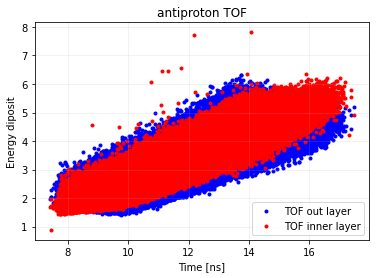

In [4]:
data = []
event = []
identical = []

"""
Read data from total data file
--------------------
"""
print("Reading data ...")
data = pd.read_table("~/CloudDocuments/Documents/GitHub/GRAMS/sensitivity/data/TOF_data/TOF_anti_proton_1e7_0_500_45_4_3.txt")    #input file
#data = pd.read_table("/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/TOF_anti_proton_1e4_0_500_45_4.dat")

"""
modification
"""
print("Modifing data ...")
for i in range(len(data.iloc[:,0])):
    if(0 <= data.iloc[i,2] <= 1):
        event.append(list(data.iloc[i,:]))
    print("Modifing process:"+str(int(100*i/len(data.iloc[:,0])))+"%", end='\r')
event = np.array(event)
print("\n finished!")

"""
recognize the data file length distribution
"""

print("\n Recognize events ...")
s = 0
for s in range(len(event[:,1])-1):
    if(int(event[s,0]) != int(event[s+1,0])):
        identical.append(s+1)
    print("Recognizing process:"+str(int(100*s/len(event[:,0])))+"%", end='\r')
    #time.sleep(0.001)
selection = np.split(event, identical)
print("Recognizing process finished!\n")
identical.append(len(event))

TOF_out_pbar_E = []
TOF_out_pbar_T = []
TOF_in_pbar_E = []
TOF_in_pbar_T = []
index = []

for i in range(1, len(selection)-1, 1):
    tempout = 0
    tempin = 0
    """
    for j in range(selection[i].shape[0]):
        if(selection[i][j][6] == 'LAr' and selection[i][j][3] == '-2212'):
            for m in range(selection[i].shape[0]):
                if(selection[i][m][5] == '-11000' or selection[i][m][5] == '-11001' or selection[i][m][5] == '-11002' or selection[i][m][5] == '-11003' or selection[i][m][5] == '-11004' or selection[i][m][5] == '-11005' and selection[i][m][3] == '-2212'):
                #if(selection[i][m][5] == '-11004' and selection[i][m][3] == '-2212'):
                    tempin = tempin + float(selection[i][m][9])
                #if(selection[i][m][5] == '-10000' or selection[i][m][5] == '-10001' or selection[i][m][5] == '-10002' or selection[i][m][5] == '-10003' or selection[i][m][5] == '-10004' or selection[i][m][5] == '-10005' and selection[i][m][3] == '-2212'):
                elif(selection[i][m][5] == '-10005' and selection[i][m][3] == '-2212'):
                    tempout = tempout + float(selection[i][m][9])
            TOF_out_pbar_E.append(tempout)
            TOF_in_pbar_E.append(tempin)
            break
    """
    for k in range(selection[i].shape[0]):
        if(selection[i][k][6] == 'LAr' and selection[i][k][3] == '-2212'):
            for m in range(k):
                if(selection[i][m][5] == '-11000' or selection[i][m][5] == '-11001' or selection[i][m][5] == '-11002' or selection[i][m][5] == '-11003' or selection[i][m][5] == '-11004' or selection[i][m][5] == '-11005' and selection[i][m][3] == '-2212'):
                #if(selection[i][m][5] == '-11004' and selection[i][m][3] == '-2212'):
                    tempin = tempin + float(selection[i][m][9])
                #if(selection[i][m][5] == '-10000' or selection[i][m][5] == '-10001' or selection[i][m][5] == '-10002' or selection[i][m][5] == '-10003' or selection[i][m][5] == '-10004' or selection[i][m][5] == '-10005' and selection[i][m][3] == '-2212'):
                if(selection[i][m][5] == '-10000' or selection[i][m][5] == '-10001' or selection[i][m][5] == '-10002' or selection[i][m][5] == '-10003' or selection[i][m][5] == '-10004' or selection[i][m][5] == '-10005' and selection[i][m][3] == '-2212'):
                    tempout = tempout + float(selection[i][m][9])
            if(tempin != 0 and tempout != 0):
                TOF_out_pbar_E.append(tempout)
                TOF_in_pbar_E.append(tempin)
                index.append(selection[i][k][0])
            for o in range(k):
                if(selection[i][o][5] == '-11000' or selection[i][o][5] == '-11001' or selection[i][o][5] == '-11002' or selection[i][o][5] == '-11003' or selection[i][o][5] == '-11004' or selection[i][o][5] == '-11005' and selection[i][o][3] == '-2212'):
#                if(selection[i][o][5] == '-11000' or selection[i][o][5] == '-11005' and selection[i][o][3] == '-2212'):
                    TOF_in_pbar_T.append(selection[i][o][7])
                    break
            for p in range(k):
                if(selection[i][p][5] == '-10000' or selection[i][p][5] == '-10001' or selection[i][p][5] == '-10002' or selection[i][p][5] == '-10003' or selection[i][p][5] == '-10004' or selection[i][p][5] == '-10005' and selection[i][p][3] == '-2212'):
#                if(selection[i][p][5] == '-10000' or selection[i][p][5] == '-10005' and selection[i][p][3] == '-2212'):
                    TOF_out_pbar_T.append(selection[i][p][7])
                    break
            theta = np.arctan((float(selection[i][p][18])-float(selection[i][k][18]))/np.sqrt((float(selection[i][p][17])-float(selection[i][k][17])) ** 2 + (float(selection[i][p][16])-float(selection[i][k][16])) ** 2))
            theta0 = np.arctan((210 - float(selection[i][0][18]))/np.sqrt((float(selection[i][0][17])-0) ** 2 + (float(selection[i][0][16])-210) ** 2))
            if(theta < theta0 - 4 * 0.0174532925 or theta > theta0 + 4 * 0.0174532925 and tempin != 0 and tempout != 0):
                TOF_in_pbar_T.pop()
                TOF_out_pbar_T.pop()
                TOF_out_pbar_E.pop()
                TOF_in_pbar_E.pop() 
                index.pop()
            break
    print("TOF data process:"+str(int(100*i/len(selection)))+"%", end='\r')

print("\n identification:finished!")

#dE_pbar = array([float(i) for i in TOF_out_pbar_E]) - array([float(i) for i in TOF_in_pbar_E])
time_pbar = array([float(i) for i in TOF_in_pbar_T]) - array([float(i) for i in TOF_out_pbar_T])
dEOut_pbar = array([float(i) for i in TOF_out_pbar_E])
dEIn_pbar = array([float(i) for i in TOF_in_pbar_E])
#plt.scatter(time_pbar, dE_pbar)
anti_proton = np.array([dEOut_pbar, dEIn_pbar, time_pbar]).transpose()
plt.scatter(time_pbar, dEOut_pbar, marker = '.', color = 'b', label = 'TOF out layer')
plt.scatter(time_pbar, dEIn_pbar,marker = '.', color = 'r', label = 'TOF inner layer')
plt.title('antiproton TOF')
plt.xlabel('Time [ns]')
plt.ylabel('Energy diposit')
plt.legend(loc='lower right')
#plt.axis([0, 20, 0, 10])
plt.grid(alpha = 0.2)
#np.savetxt('/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/TOF_anti_proton_1e7_0_500_45_4_result.txt', anti_proton, delimiter = '\t ', fmt='%.6s')
with open("/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/TOF_anti_proton_1e7_0_500_45_4_result.txt", "ab") as f:    #input file
#with open("/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/test.txt", "ab") as f:    #test run
    #f.write(b"\n")
    np.savetxt(f, anti_proton)
print("finished!")

Reading data ...
Modifing data ...
Modifing process:99%
 finished!

 Recognize events ...
Recognizing process finished!

TOF data process:99%
 identification:finished!
finished!


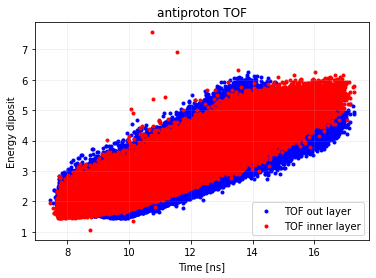

In [5]:
data = []
event = []
identical = []

"""
Read data from total data file
--------------------
"""
print("Reading data ...")
data = pd.read_table("~/CloudDocuments/Documents/GitHub/GRAMS/sensitivity/data/TOF_data/TOF_anti_proton_1e7_0_500_45_4_4.txt")    #input file
#data = pd.read_table("/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/TOF_anti_proton_1e4_0_500_45_4.dat")

"""
modification
"""
print("Modifing data ...")
for i in range(len(data.iloc[:,0])):
    if(0 <= data.iloc[i,2] <= 1):
        event.append(list(data.iloc[i,:]))
    print("Modifing process:"+str(int(100*i/len(data.iloc[:,0])))+"%", end='\r')
event = np.array(event)
print("\n finished!")

"""
recognize the data file length distribution
"""

print("\n Recognize events ...")
s = 0
for s in range(len(event[:,1])-1):
    if(int(event[s,0]) != int(event[s+1,0])):
        identical.append(s+1)
    print("Recognizing process:"+str(int(100*s/len(event[:,0])))+"%", end='\r')
    #time.sleep(0.001)
selection = np.split(event, identical)
print("Recognizing process finished!\n")
identical.append(len(event))

TOF_out_pbar_E = []
TOF_out_pbar_T = []
TOF_in_pbar_E = []
TOF_in_pbar_T = []
index = []

for i in range(1, len(selection)-1, 1):
    tempout = 0
    tempin = 0
    """
    for j in range(selection[i].shape[0]):
        if(selection[i][j][6] == 'LAr' and selection[i][j][3] == '-2212'):
            for m in range(selection[i].shape[0]):
                if(selection[i][m][5] == '-11000' or selection[i][m][5] == '-11001' or selection[i][m][5] == '-11002' or selection[i][m][5] == '-11003' or selection[i][m][5] == '-11004' or selection[i][m][5] == '-11005' and selection[i][m][3] == '-2212'):
                #if(selection[i][m][5] == '-11004' and selection[i][m][3] == '-2212'):
                    tempin = tempin + float(selection[i][m][9])
                #if(selection[i][m][5] == '-10000' or selection[i][m][5] == '-10001' or selection[i][m][5] == '-10002' or selection[i][m][5] == '-10003' or selection[i][m][5] == '-10004' or selection[i][m][5] == '-10005' and selection[i][m][3] == '-2212'):
                elif(selection[i][m][5] == '-10005' and selection[i][m][3] == '-2212'):
                    tempout = tempout + float(selection[i][m][9])
            TOF_out_pbar_E.append(tempout)
            TOF_in_pbar_E.append(tempin)
            break
    """
    for k in range(selection[i].shape[0]):
        if(selection[i][k][6] == 'LAr' and selection[i][k][3] == '-2212'):
            for m in range(k):
                if(selection[i][m][5] == '-11000' or selection[i][m][5] == '-11001' or selection[i][m][5] == '-11002' or selection[i][m][5] == '-11003' or selection[i][m][5] == '-11004' or selection[i][m][5] == '-11005' and selection[i][m][3] == '-2212'):
                #if(selection[i][m][5] == '-11004' and selection[i][m][3] == '-2212'):
                    tempin = tempin + float(selection[i][m][9])
                #if(selection[i][m][5] == '-10000' or selection[i][m][5] == '-10001' or selection[i][m][5] == '-10002' or selection[i][m][5] == '-10003' or selection[i][m][5] == '-10004' or selection[i][m][5] == '-10005' and selection[i][m][3] == '-2212'):
                if(selection[i][m][5] == '-10000' or selection[i][m][5] == '-10001' or selection[i][m][5] == '-10002' or selection[i][m][5] == '-10003' or selection[i][m][5] == '-10004' or selection[i][m][5] == '-10005' and selection[i][m][3] == '-2212'):
                    tempout = tempout + float(selection[i][m][9])
            if(tempin != 0 and tempout != 0):
                TOF_out_pbar_E.append(tempout)
                TOF_in_pbar_E.append(tempin)
                index.append(selection[i][k][0])
            for o in range(k):
                if(selection[i][o][5] == '-11000' or selection[i][o][5] == '-11001' or selection[i][o][5] == '-11002' or selection[i][o][5] == '-11003' or selection[i][o][5] == '-11004' or selection[i][o][5] == '-11005' and selection[i][o][3] == '-2212'):
#                if(selection[i][o][5] == '-11000' or selection[i][o][5] == '-11005' and selection[i][o][3] == '-2212'):
                    TOF_in_pbar_T.append(selection[i][o][7])
                    break
            for p in range(k):
                if(selection[i][p][5] == '-10000' or selection[i][p][5] == '-10001' or selection[i][p][5] == '-10002' or selection[i][p][5] == '-10003' or selection[i][p][5] == '-10004' or selection[i][p][5] == '-10005' and selection[i][p][3] == '-2212'):
#                if(selection[i][p][5] == '-10000' or selection[i][p][5] == '-10005' and selection[i][p][3] == '-2212'):
                    TOF_out_pbar_T.append(selection[i][p][7])
                    break
            theta = np.arctan((float(selection[i][p][18])-float(selection[i][k][18]))/np.sqrt((float(selection[i][p][17])-float(selection[i][k][17])) ** 2 + (float(selection[i][p][16])-float(selection[i][k][16])) ** 2))
            theta0 = np.arctan((210 - float(selection[i][0][18]))/np.sqrt((float(selection[i][0][17])-0) ** 2 + (float(selection[i][0][16])-210) ** 2))
            if(theta < theta0 - 4 * 0.0174532925 or theta > theta0 + 4 * 0.0174532925 and tempin != 0 and tempout != 0):
                TOF_in_pbar_T.pop()
                TOF_out_pbar_T.pop()
                TOF_out_pbar_E.pop()
                TOF_in_pbar_E.pop() 
                index.pop()
            break
    print("TOF data process:"+str(int(100*i/len(selection)))+"%", end='\r')

print("\n identification:finished!")

#dE_pbar = array([float(i) for i in TOF_out_pbar_E]) - array([float(i) for i in TOF_in_pbar_E])
time_pbar = array([float(i) for i in TOF_in_pbar_T]) - array([float(i) for i in TOF_out_pbar_T])
dEOut_pbar = array([float(i) for i in TOF_out_pbar_E])
dEIn_pbar = array([float(i) for i in TOF_in_pbar_E])
#plt.scatter(time_pbar, dE_pbar)
anti_proton = np.array([dEOut_pbar, dEIn_pbar, time_pbar]).transpose()
plt.scatter(time_pbar, dEOut_pbar, marker = '.', color = 'b', label = 'TOF out layer')
plt.scatter(time_pbar, dEIn_pbar,marker = '.', color = 'r', label = 'TOF inner layer')
plt.title('antiproton TOF')
plt.xlabel('Time [ns]')
plt.ylabel('Energy diposit')
plt.legend(loc='lower right')
#plt.axis([0, 20, 0, 10])
plt.grid(alpha = 0.2)
#np.savetxt('/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/TOF_anti_proton_1e7_0_500_45_4_result.txt', anti_proton, delimiter = '\t ', fmt='%.6s')
with open("/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/TOF_anti_proton_1e7_0_500_45_4_result.txt", "ab") as f:    #input file
#with open("/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/test.txt", "ab") as f:    #test run
    #f.write(b"\n")
    np.savetxt(f, anti_proton)
print("finished!")

Reading data ...
Modifing data ...
Modifing process:99%
 finished!

 Recognize events ...
Recognizing process finished!

TOF data process:99%
 identification:finished!
finished!


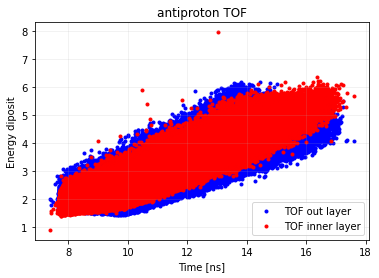

In [6]:
data = []
event = []
identical = []

"""
Read data from total data file
--------------------
"""
print("Reading data ...")
data = pd.read_table("~/CloudDocuments/Documents/GitHub/GRAMS/sensitivity/data/TOF_data/TOF_anti_proton_1e7_0_500_45_4_5.txt")    #input file
#data = pd.read_table("/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/TOF_anti_proton_1e4_0_500_45_4.dat")

"""
modification
"""
print("Modifing data ...")
for i in range(len(data.iloc[:,0])):
    if(0 <= data.iloc[i,2] <= 1):
        event.append(list(data.iloc[i,:]))
    print("Modifing process:"+str(int(100*i/len(data.iloc[:,0])))+"%", end='\r')
event = np.array(event)
print("\n finished!")

"""
recognize the data file length distribution
"""

print("\n Recognize events ...")
s = 0
for s in range(len(event[:,1])-1):
    if(int(event[s,0]) != int(event[s+1,0])):
        identical.append(s+1)
    print("Recognizing process:"+str(int(100*s/len(event[:,0])))+"%", end='\r')
    #time.sleep(0.001)
selection = np.split(event, identical)
print("Recognizing process finished!\n")
identical.append(len(event))

TOF_out_pbar_E = []
TOF_out_pbar_T = []
TOF_in_pbar_E = []
TOF_in_pbar_T = []
index = []

for i in range(1, len(selection)-1, 1):
    tempout = 0
    tempin = 0
    """
    for j in range(selection[i].shape[0]):
        if(selection[i][j][6] == 'LAr' and selection[i][j][3] == '-2212'):
            for m in range(selection[i].shape[0]):
                if(selection[i][m][5] == '-11000' or selection[i][m][5] == '-11001' or selection[i][m][5] == '-11002' or selection[i][m][5] == '-11003' or selection[i][m][5] == '-11004' or selection[i][m][5] == '-11005' and selection[i][m][3] == '-2212'):
                #if(selection[i][m][5] == '-11004' and selection[i][m][3] == '-2212'):
                    tempin = tempin + float(selection[i][m][9])
                #if(selection[i][m][5] == '-10000' or selection[i][m][5] == '-10001' or selection[i][m][5] == '-10002' or selection[i][m][5] == '-10003' or selection[i][m][5] == '-10004' or selection[i][m][5] == '-10005' and selection[i][m][3] == '-2212'):
                elif(selection[i][m][5] == '-10005' and selection[i][m][3] == '-2212'):
                    tempout = tempout + float(selection[i][m][9])
            TOF_out_pbar_E.append(tempout)
            TOF_in_pbar_E.append(tempin)
            break
    """
    for k in range(selection[i].shape[0]):
        if(selection[i][k][6] == 'LAr' and selection[i][k][3] == '-2212'):
            for m in range(k):
                if(selection[i][m][5] == '-11000' or selection[i][m][5] == '-11001' or selection[i][m][5] == '-11002' or selection[i][m][5] == '-11003' or selection[i][m][5] == '-11004' or selection[i][m][5] == '-11005' and selection[i][m][3] == '-2212'):
                #if(selection[i][m][5] == '-11004' and selection[i][m][3] == '-2212'):
                    tempin = tempin + float(selection[i][m][9])
                #if(selection[i][m][5] == '-10000' or selection[i][m][5] == '-10001' or selection[i][m][5] == '-10002' or selection[i][m][5] == '-10003' or selection[i][m][5] == '-10004' or selection[i][m][5] == '-10005' and selection[i][m][3] == '-2212'):
                if(selection[i][m][5] == '-10000' or selection[i][m][5] == '-10001' or selection[i][m][5] == '-10002' or selection[i][m][5] == '-10003' or selection[i][m][5] == '-10004' or selection[i][m][5] == '-10005' and selection[i][m][3] == '-2212'):
                    tempout = tempout + float(selection[i][m][9])
            if(tempin != 0 and tempout != 0):
                TOF_out_pbar_E.append(tempout)
                TOF_in_pbar_E.append(tempin)
                index.append(selection[i][k][0])
            for o in range(k):
                if(selection[i][o][5] == '-11000' or selection[i][o][5] == '-11001' or selection[i][o][5] == '-11002' or selection[i][o][5] == '-11003' or selection[i][o][5] == '-11004' or selection[i][o][5] == '-11005' and selection[i][o][3] == '-2212'):
#                if(selection[i][o][5] == '-11000' or selection[i][o][5] == '-11005' and selection[i][o][3] == '-2212'):
                    TOF_in_pbar_T.append(selection[i][o][7])
                    break
            for p in range(k):
                if(selection[i][p][5] == '-10000' or selection[i][p][5] == '-10001' or selection[i][p][5] == '-10002' or selection[i][p][5] == '-10003' or selection[i][p][5] == '-10004' or selection[i][p][5] == '-10005' and selection[i][p][3] == '-2212'):
#                if(selection[i][p][5] == '-10000' or selection[i][p][5] == '-10005' and selection[i][p][3] == '-2212'):
                    TOF_out_pbar_T.append(selection[i][p][7])
                    break
            theta = np.arctan((float(selection[i][p][18])-float(selection[i][k][18]))/np.sqrt((float(selection[i][p][17])-float(selection[i][k][17])) ** 2 + (float(selection[i][p][16])-float(selection[i][k][16])) ** 2))
            theta0 = np.arctan((210 - float(selection[i][0][18]))/np.sqrt((float(selection[i][0][17])-0) ** 2 + (float(selection[i][0][16])-210) ** 2))
            if(theta < theta0 - 4 * 0.0174532925 or theta > theta0 + 4 * 0.0174532925 and tempin != 0 and tempout != 0):
                TOF_in_pbar_T.pop()
                TOF_out_pbar_T.pop()
                TOF_out_pbar_E.pop()
                TOF_in_pbar_E.pop() 
                index.pop()
            break
    print("TOF data process:"+str(int(100*i/len(selection)))+"%", end='\r')

print("\n identification:finished!")

#dE_pbar = array([float(i) for i in TOF_out_pbar_E]) - array([float(i) for i in TOF_in_pbar_E])
time_pbar = array([float(i) for i in TOF_in_pbar_T]) - array([float(i) for i in TOF_out_pbar_T])
dEOut_pbar = array([float(i) for i in TOF_out_pbar_E])
dEIn_pbar = array([float(i) for i in TOF_in_pbar_E])
#plt.scatter(time_pbar, dE_pbar)
anti_proton = np.array([dEOut_pbar, dEIn_pbar, time_pbar]).transpose()
plt.scatter(time_pbar, dEOut_pbar, marker = '.', color = 'b', label = 'TOF out layer')
plt.scatter(time_pbar, dEIn_pbar,marker = '.', color = 'r', label = 'TOF inner layer')
plt.title('antiproton TOF')
plt.xlabel('Time [ns]')
plt.ylabel('Energy diposit')
plt.legend(loc='lower right')
#plt.axis([0, 20, 0, 10])
plt.grid(alpha = 0.2)
#np.savetxt('/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/TOF_anti_proton_1e7_0_500_45_4_result.txt', anti_proton, delimiter = '\t ', fmt='%.6s')
with open("/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/TOF_anti_proton_1e7_0_500_45_4_result.txt", "ab") as f:    #input file
#with open("/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/test.txt", "ab") as f:    #test run
    #f.write(b"\n")
    np.savetxt(f, anti_proton)
print("finished!")

Reading data ...
Modifing data ...
Modifing process:99%
 finished!

 Recognize events ...
Recognizing process finished!

TOF data process:99%
 identification:finished!
finished!


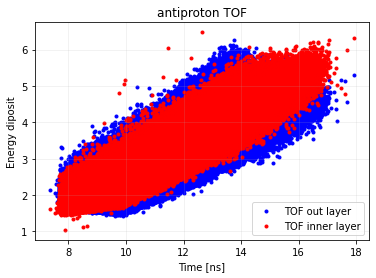

In [7]:
data = []
event = []
identical = []

"""
Read data from total data file
--------------------
"""
print("Reading data ...")
data = pd.read_table("~/CloudDocuments/Documents/GitHub/GRAMS/sensitivity/data/TOF_data/TOF_anti_proton_1e7_0_500_45_4_6.txt")    #input file
#data = pd.read_table("/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/TOF_anti_proton_1e4_0_500_45_4.dat")

"""
modification
"""
print("Modifing data ...")
for i in range(len(data.iloc[:,0])):
    if(0 <= data.iloc[i,2] <= 1):
        event.append(list(data.iloc[i,:]))
    print("Modifing process:"+str(int(100*i/len(data.iloc[:,0])))+"%", end='\r')
event = np.array(event)
print("\n finished!")

"""
recognize the data file length distribution
"""

print("\n Recognize events ...")
s = 0
for s in range(len(event[:,1])-1):
    if(int(event[s,0]) != int(event[s+1,0])):
        identical.append(s+1)
    print("Recognizing process:"+str(int(100*s/len(event[:,0])))+"%", end='\r')
    #time.sleep(0.001)
selection = np.split(event, identical)
print("Recognizing process finished!\n")
identical.append(len(event))

TOF_out_pbar_E = []
TOF_out_pbar_T = []
TOF_in_pbar_E = []
TOF_in_pbar_T = []
index = []

for i in range(1, len(selection)-1, 1):
    tempout = 0
    tempin = 0
    """
    for j in range(selection[i].shape[0]):
        if(selection[i][j][6] == 'LAr' and selection[i][j][3] == '-2212'):
            for m in range(selection[i].shape[0]):
                if(selection[i][m][5] == '-11000' or selection[i][m][5] == '-11001' or selection[i][m][5] == '-11002' or selection[i][m][5] == '-11003' or selection[i][m][5] == '-11004' or selection[i][m][5] == '-11005' and selection[i][m][3] == '-2212'):
                #if(selection[i][m][5] == '-11004' and selection[i][m][3] == '-2212'):
                    tempin = tempin + float(selection[i][m][9])
                #if(selection[i][m][5] == '-10000' or selection[i][m][5] == '-10001' or selection[i][m][5] == '-10002' or selection[i][m][5] == '-10003' or selection[i][m][5] == '-10004' or selection[i][m][5] == '-10005' and selection[i][m][3] == '-2212'):
                elif(selection[i][m][5] == '-10005' and selection[i][m][3] == '-2212'):
                    tempout = tempout + float(selection[i][m][9])
            TOF_out_pbar_E.append(tempout)
            TOF_in_pbar_E.append(tempin)
            break
    """
    for k in range(selection[i].shape[0]):
        if(selection[i][k][6] == 'LAr' and selection[i][k][3] == '-2212'):
            for m in range(k):
                if(selection[i][m][5] == '-11000' or selection[i][m][5] == '-11001' or selection[i][m][5] == '-11002' or selection[i][m][5] == '-11003' or selection[i][m][5] == '-11004' or selection[i][m][5] == '-11005' and selection[i][m][3] == '-2212'):
                #if(selection[i][m][5] == '-11004' and selection[i][m][3] == '-2212'):
                    tempin = tempin + float(selection[i][m][9])
                #if(selection[i][m][5] == '-10000' or selection[i][m][5] == '-10001' or selection[i][m][5] == '-10002' or selection[i][m][5] == '-10003' or selection[i][m][5] == '-10004' or selection[i][m][5] == '-10005' and selection[i][m][3] == '-2212'):
                if(selection[i][m][5] == '-10000' or selection[i][m][5] == '-10001' or selection[i][m][5] == '-10002' or selection[i][m][5] == '-10003' or selection[i][m][5] == '-10004' or selection[i][m][5] == '-10005' and selection[i][m][3] == '-2212'):
                    tempout = tempout + float(selection[i][m][9])
            if(tempin != 0 and tempout != 0):
                TOF_out_pbar_E.append(tempout)
                TOF_in_pbar_E.append(tempin)
                index.append(selection[i][k][0])
            for o in range(k):
                if(selection[i][o][5] == '-11000' or selection[i][o][5] == '-11001' or selection[i][o][5] == '-11002' or selection[i][o][5] == '-11003' or selection[i][o][5] == '-11004' or selection[i][o][5] == '-11005' and selection[i][o][3] == '-2212'):
#                if(selection[i][o][5] == '-11000' or selection[i][o][5] == '-11005' and selection[i][o][3] == '-2212'):
                    TOF_in_pbar_T.append(selection[i][o][7])
                    break
            for p in range(k):
                if(selection[i][p][5] == '-10000' or selection[i][p][5] == '-10001' or selection[i][p][5] == '-10002' or selection[i][p][5] == '-10003' or selection[i][p][5] == '-10004' or selection[i][p][5] == '-10005' and selection[i][p][3] == '-2212'):
#                if(selection[i][p][5] == '-10000' or selection[i][p][5] == '-10005' and selection[i][p][3] == '-2212'):
                    TOF_out_pbar_T.append(selection[i][p][7])
                    break
            theta = np.arctan((float(selection[i][p][18])-float(selection[i][k][18]))/np.sqrt((float(selection[i][p][17])-float(selection[i][k][17])) ** 2 + (float(selection[i][p][16])-float(selection[i][k][16])) ** 2))
            theta0 = np.arctan((210 - float(selection[i][0][18]))/np.sqrt((float(selection[i][0][17])-0) ** 2 + (float(selection[i][0][16])-210) ** 2))
            if(theta < theta0 - 4 * 0.0174532925 or theta > theta0 + 4 * 0.0174532925 and tempin != 0 and tempout != 0):
                TOF_in_pbar_T.pop()
                TOF_out_pbar_T.pop()
                TOF_out_pbar_E.pop()
                TOF_in_pbar_E.pop() 
                index.pop()
            break
    print("TOF data process:"+str(int(100*i/len(selection)))+"%", end='\r')

print("\n identification:finished!")

#dE_pbar = array([float(i) for i in TOF_out_pbar_E]) - array([float(i) for i in TOF_in_pbar_E])
time_pbar = array([float(i) for i in TOF_in_pbar_T]) - array([float(i) for i in TOF_out_pbar_T])
dEOut_pbar = array([float(i) for i in TOF_out_pbar_E])
dEIn_pbar = array([float(i) for i in TOF_in_pbar_E])
#plt.scatter(time_pbar, dE_pbar)
anti_proton = np.array([dEOut_pbar, dEIn_pbar, time_pbar]).transpose()
plt.scatter(time_pbar, dEOut_pbar, marker = '.', color = 'b', label = 'TOF out layer')
plt.scatter(time_pbar, dEIn_pbar,marker = '.', color = 'r', label = 'TOF inner layer')
plt.title('antiproton TOF')
plt.xlabel('Time [ns]')
plt.ylabel('Energy diposit')
plt.legend(loc='lower right')
#plt.axis([0, 20, 0, 10])
plt.grid(alpha = 0.2)
#np.savetxt('/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/TOF_anti_proton_1e7_0_500_45_4_result.txt', anti_proton, delimiter = '\t ', fmt='%.6s')
with open("/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/TOF_anti_proton_1e7_0_500_45_4_result.txt", "ab") as f:    #input file
#with open("/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/test.txt", "ab") as f:    #test run
    #f.write(b"\n")
    np.savetxt(f, anti_proton)
print("finished!")

Reading data ...
Modifing data ...
Modifing process:99%
 finished!

 Recognize events ...
Recognizing process finished!

TOF data process:99%
 identification:finished!
finished!


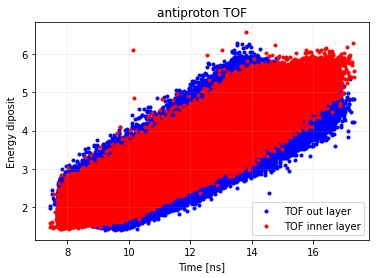

In [8]:
data = []
event = []
identical = []

"""
Read data from total data file
--------------------
"""
print("Reading data ...")
data = pd.read_table("~/CloudDocuments/Documents/GitHub/GRAMS/sensitivity/data/TOF_data/TOF_anti_proton_1e7_0_500_45_4_7.txt")    #input file
#data = pd.read_table("/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/TOF_anti_proton_1e4_0_500_45_4.dat")

"""
modification
"""
print("Modifing data ...")
for i in range(len(data.iloc[:,0])):
    if(0 <= data.iloc[i,2] <= 1):
        event.append(list(data.iloc[i,:]))
    print("Modifing process:"+str(int(100*i/len(data.iloc[:,0])))+"%", end='\r')
event = np.array(event)
print("\n finished!")

"""
recognize the data file length distribution
"""

print("\n Recognize events ...")
s = 0
for s in range(len(event[:,1])-1):
    if(int(event[s,0]) != int(event[s+1,0])):
        identical.append(s+1)
    print("Recognizing process:"+str(int(100*s/len(event[:,0])))+"%", end='\r')
    #time.sleep(0.001)
selection = np.split(event, identical)
print("Recognizing process finished!\n")
identical.append(len(event))

TOF_out_pbar_E = []
TOF_out_pbar_T = []
TOF_in_pbar_E = []
TOF_in_pbar_T = []
index = []

for i in range(1, len(selection)-1, 1):
    tempout = 0
    tempin = 0
    """
    for j in range(selection[i].shape[0]):
        if(selection[i][j][6] == 'LAr' and selection[i][j][3] == '-2212'):
            for m in range(selection[i].shape[0]):
                if(selection[i][m][5] == '-11000' or selection[i][m][5] == '-11001' or selection[i][m][5] == '-11002' or selection[i][m][5] == '-11003' or selection[i][m][5] == '-11004' or selection[i][m][5] == '-11005' and selection[i][m][3] == '-2212'):
                #if(selection[i][m][5] == '-11004' and selection[i][m][3] == '-2212'):
                    tempin = tempin + float(selection[i][m][9])
                #if(selection[i][m][5] == '-10000' or selection[i][m][5] == '-10001' or selection[i][m][5] == '-10002' or selection[i][m][5] == '-10003' or selection[i][m][5] == '-10004' or selection[i][m][5] == '-10005' and selection[i][m][3] == '-2212'):
                elif(selection[i][m][5] == '-10005' and selection[i][m][3] == '-2212'):
                    tempout = tempout + float(selection[i][m][9])
            TOF_out_pbar_E.append(tempout)
            TOF_in_pbar_E.append(tempin)
            break
    """
    for k in range(selection[i].shape[0]):
        if(selection[i][k][6] == 'LAr' and selection[i][k][3] == '-2212'):
            for m in range(k):
                if(selection[i][m][5] == '-11000' or selection[i][m][5] == '-11001' or selection[i][m][5] == '-11002' or selection[i][m][5] == '-11003' or selection[i][m][5] == '-11004' or selection[i][m][5] == '-11005' and selection[i][m][3] == '-2212'):
                #if(selection[i][m][5] == '-11004' and selection[i][m][3] == '-2212'):
                    tempin = tempin + float(selection[i][m][9])
                #if(selection[i][m][5] == '-10000' or selection[i][m][5] == '-10001' or selection[i][m][5] == '-10002' or selection[i][m][5] == '-10003' or selection[i][m][5] == '-10004' or selection[i][m][5] == '-10005' and selection[i][m][3] == '-2212'):
                if(selection[i][m][5] == '-10000' or selection[i][m][5] == '-10001' or selection[i][m][5] == '-10002' or selection[i][m][5] == '-10003' or selection[i][m][5] == '-10004' or selection[i][m][5] == '-10005' and selection[i][m][3] == '-2212'):
                    tempout = tempout + float(selection[i][m][9])
            if(tempin != 0 and tempout != 0):
                TOF_out_pbar_E.append(tempout)
                TOF_in_pbar_E.append(tempin)
                index.append(selection[i][k][0])
            for o in range(k):
                if(selection[i][o][5] == '-11000' or selection[i][o][5] == '-11001' or selection[i][o][5] == '-11002' or selection[i][o][5] == '-11003' or selection[i][o][5] == '-11004' or selection[i][o][5] == '-11005' and selection[i][o][3] == '-2212'):
#                if(selection[i][o][5] == '-11000' or selection[i][o][5] == '-11005' and selection[i][o][3] == '-2212'):
                    TOF_in_pbar_T.append(selection[i][o][7])
                    break
            for p in range(k):
                if(selection[i][p][5] == '-10000' or selection[i][p][5] == '-10001' or selection[i][p][5] == '-10002' or selection[i][p][5] == '-10003' or selection[i][p][5] == '-10004' or selection[i][p][5] == '-10005' and selection[i][p][3] == '-2212'):
#                if(selection[i][p][5] == '-10000' or selection[i][p][5] == '-10005' and selection[i][p][3] == '-2212'):
                    TOF_out_pbar_T.append(selection[i][p][7])
                    break
            theta = np.arctan((float(selection[i][p][18])-float(selection[i][k][18]))/np.sqrt((float(selection[i][p][17])-float(selection[i][k][17])) ** 2 + (float(selection[i][p][16])-float(selection[i][k][16])) ** 2))
            theta0 = np.arctan((210 - float(selection[i][0][18]))/np.sqrt((float(selection[i][0][17])-0) ** 2 + (float(selection[i][0][16])-210) ** 2))
            if(theta < theta0 - 4 * 0.0174532925 or theta > theta0 + 4 * 0.0174532925 and tempin != 0 and tempout != 0):
                TOF_in_pbar_T.pop()
                TOF_out_pbar_T.pop()
                TOF_out_pbar_E.pop()
                TOF_in_pbar_E.pop() 
                index.pop()
            break
    print("TOF data process:"+str(int(100*i/len(selection)))+"%", end='\r')

print("\n identification:finished!")

#dE_pbar = array([float(i) for i in TOF_out_pbar_E]) - array([float(i) for i in TOF_in_pbar_E])
time_pbar = array([float(i) for i in TOF_in_pbar_T]) - array([float(i) for i in TOF_out_pbar_T])
dEOut_pbar = array([float(i) for i in TOF_out_pbar_E])
dEIn_pbar = array([float(i) for i in TOF_in_pbar_E])
#plt.scatter(time_pbar, dE_pbar)
anti_proton = np.array([dEOut_pbar, dEIn_pbar, time_pbar]).transpose()
plt.scatter(time_pbar, dEOut_pbar, marker = '.', color = 'b', label = 'TOF out layer')
plt.scatter(time_pbar, dEIn_pbar,marker = '.', color = 'r', label = 'TOF inner layer')
plt.title('antiproton TOF')
plt.xlabel('Time [ns]')
plt.ylabel('Energy diposit')
plt.legend(loc='lower right')
#plt.axis([0, 20, 0, 10])
plt.grid(alpha = 0.2)
#np.savetxt('/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/TOF_anti_proton_1e7_0_500_45_4_result.txt', anti_proton, delimiter = '\t ', fmt='%.6s')
with open("/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/TOF_anti_proton_1e7_0_500_45_4_result.txt", "ab") as f:    #input file
#with open("/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/test.txt", "ab") as f:    #test run
    #f.write(b"\n")
    np.savetxt(f, anti_proton)
print("finished!")

Reading data ...
Modifing data ...
Modifing process:99%
 finished!

 Recognize events ...
Recognizing process finished!

TOF data process:99%
 identification:finished!
finished!


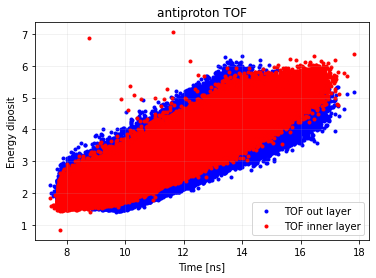

In [9]:
data = []
event = []
identical = []

"""
Read data from total data file
--------------------
"""
print("Reading data ...")
data = pd.read_table("~/CloudDocuments/Documents/GitHub/GRAMS/sensitivity/data/TOF_data/TOF_anti_proton_1e7_0_500_45_4_8.txt")    #input file
#data = pd.read_table("/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/TOF_anti_proton_1e4_0_500_45_4.dat")

"""
modification
"""
print("Modifing data ...")
for i in range(len(data.iloc[:,0])):
    if(0 <= data.iloc[i,2] <= 1):
        event.append(list(data.iloc[i,:]))
    print("Modifing process:"+str(int(100*i/len(data.iloc[:,0])))+"%", end='\r')
event = np.array(event)
print("\n finished!")

"""
recognize the data file length distribution
"""

print("\n Recognize events ...")
s = 0
for s in range(len(event[:,1])-1):
    if(int(event[s,0]) != int(event[s+1,0])):
        identical.append(s+1)
    print("Recognizing process:"+str(int(100*s/len(event[:,0])))+"%", end='\r')
    #time.sleep(0.001)
selection = np.split(event, identical)
print("Recognizing process finished!\n")
identical.append(len(event))

TOF_out_pbar_E = []
TOF_out_pbar_T = []
TOF_in_pbar_E = []
TOF_in_pbar_T = []
index = []

for i in range(1, len(selection)-1, 1):
    tempout = 0
    tempin = 0
    """
    for j in range(selection[i].shape[0]):
        if(selection[i][j][6] == 'LAr' and selection[i][j][3] == '-2212'):
            for m in range(selection[i].shape[0]):
                if(selection[i][m][5] == '-11000' or selection[i][m][5] == '-11001' or selection[i][m][5] == '-11002' or selection[i][m][5] == '-11003' or selection[i][m][5] == '-11004' or selection[i][m][5] == '-11005' and selection[i][m][3] == '-2212'):
                #if(selection[i][m][5] == '-11004' and selection[i][m][3] == '-2212'):
                    tempin = tempin + float(selection[i][m][9])
                #if(selection[i][m][5] == '-10000' or selection[i][m][5] == '-10001' or selection[i][m][5] == '-10002' or selection[i][m][5] == '-10003' or selection[i][m][5] == '-10004' or selection[i][m][5] == '-10005' and selection[i][m][3] == '-2212'):
                elif(selection[i][m][5] == '-10005' and selection[i][m][3] == '-2212'):
                    tempout = tempout + float(selection[i][m][9])
            TOF_out_pbar_E.append(tempout)
            TOF_in_pbar_E.append(tempin)
            break
    """
    for k in range(selection[i].shape[0]):
        if(selection[i][k][6] == 'LAr' and selection[i][k][3] == '-2212'):
            for m in range(k):
                if(selection[i][m][5] == '-11000' or selection[i][m][5] == '-11001' or selection[i][m][5] == '-11002' or selection[i][m][5] == '-11003' or selection[i][m][5] == '-11004' or selection[i][m][5] == '-11005' and selection[i][m][3] == '-2212'):
                #if(selection[i][m][5] == '-11004' and selection[i][m][3] == '-2212'):
                    tempin = tempin + float(selection[i][m][9])
                #if(selection[i][m][5] == '-10000' or selection[i][m][5] == '-10001' or selection[i][m][5] == '-10002' or selection[i][m][5] == '-10003' or selection[i][m][5] == '-10004' or selection[i][m][5] == '-10005' and selection[i][m][3] == '-2212'):
                if(selection[i][m][5] == '-10000' or selection[i][m][5] == '-10001' or selection[i][m][5] == '-10002' or selection[i][m][5] == '-10003' or selection[i][m][5] == '-10004' or selection[i][m][5] == '-10005' and selection[i][m][3] == '-2212'):
                    tempout = tempout + float(selection[i][m][9])
            if(tempin != 0 and tempout != 0):
                TOF_out_pbar_E.append(tempout)
                TOF_in_pbar_E.append(tempin)
                index.append(selection[i][k][0])
            for o in range(k):
                if(selection[i][o][5] == '-11000' or selection[i][o][5] == '-11001' or selection[i][o][5] == '-11002' or selection[i][o][5] == '-11003' or selection[i][o][5] == '-11004' or selection[i][o][5] == '-11005' and selection[i][o][3] == '-2212'):
#                if(selection[i][o][5] == '-11000' or selection[i][o][5] == '-11005' and selection[i][o][3] == '-2212'):
                    TOF_in_pbar_T.append(selection[i][o][7])
                    break
            for p in range(k):
                if(selection[i][p][5] == '-10000' or selection[i][p][5] == '-10001' or selection[i][p][5] == '-10002' or selection[i][p][5] == '-10003' or selection[i][p][5] == '-10004' or selection[i][p][5] == '-10005' and selection[i][p][3] == '-2212'):
#                if(selection[i][p][5] == '-10000' or selection[i][p][5] == '-10005' and selection[i][p][3] == '-2212'):
                    TOF_out_pbar_T.append(selection[i][p][7])
                    break
            theta = np.arctan((float(selection[i][p][18])-float(selection[i][k][18]))/np.sqrt((float(selection[i][p][17])-float(selection[i][k][17])) ** 2 + (float(selection[i][p][16])-float(selection[i][k][16])) ** 2))
            theta0 = np.arctan((210 - float(selection[i][0][18]))/np.sqrt((float(selection[i][0][17])-0) ** 2 + (float(selection[i][0][16])-210) ** 2))
            if(theta < theta0 - 4 * 0.0174532925 or theta > theta0 + 4 * 0.0174532925 and tempin != 0 and tempout != 0):
                TOF_in_pbar_T.pop()
                TOF_out_pbar_T.pop()
                TOF_out_pbar_E.pop()
                TOF_in_pbar_E.pop() 
                index.pop()
            break
    print("TOF data process:"+str(int(100*i/len(selection)))+"%", end='\r')

print("\n identification:finished!")

#dE_pbar = array([float(i) for i in TOF_out_pbar_E]) - array([float(i) for i in TOF_in_pbar_E])
time_pbar = array([float(i) for i in TOF_in_pbar_T]) - array([float(i) for i in TOF_out_pbar_T])
dEOut_pbar = array([float(i) for i in TOF_out_pbar_E])
dEIn_pbar = array([float(i) for i in TOF_in_pbar_E])
#plt.scatter(time_pbar, dE_pbar)
anti_proton = np.array([dEOut_pbar, dEIn_pbar, time_pbar]).transpose()
plt.scatter(time_pbar, dEOut_pbar, marker = '.', color = 'b', label = 'TOF out layer')
plt.scatter(time_pbar, dEIn_pbar,marker = '.', color = 'r', label = 'TOF inner layer')
plt.title('antiproton TOF')
plt.xlabel('Time [ns]')
plt.ylabel('Energy diposit')
plt.legend(loc='lower right')
#plt.axis([0, 20, 0, 10])
plt.grid(alpha = 0.2)
#np.savetxt('/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/TOF_anti_proton_1e7_0_500_45_4_result.txt', anti_proton, delimiter = '\t ', fmt='%.6s')
with open("/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/TOF_anti_proton_1e7_0_500_45_4_result.txt", "ab") as f:    #input file
#with open("/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/test.txt", "ab") as f:    #test run
    #f.write(b"\n")
    np.savetxt(f, anti_proton)
print("finished!")

Reading data ...
Modifing data ...
Modifing process:99%
 finished!

 Recognize events ...
Recognizing process finished!

TOF data process:99%
 identification:finished!
finished!


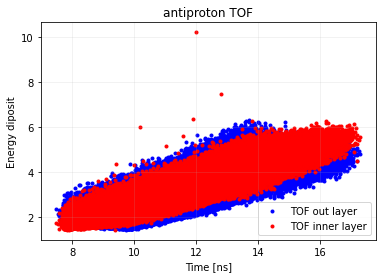

In [10]:
data = []
event = []
identical = []

"""
Read data from total data file
--------------------
"""
print("Reading data ...")
data = pd.read_table("~/CloudDocuments/Documents/GitHub/GRAMS/sensitivity/data/TOF_data/TOF_anti_proton_1e7_0_500_45_4_9.txt")    #input file
#data = pd.read_table("/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/TOF_anti_proton_1e4_0_500_45_4.dat")

"""
modification
"""
print("Modifing data ...")
for i in range(len(data.iloc[:,0])):
    if(0 <= data.iloc[i,2] <= 1):
        event.append(list(data.iloc[i,:]))
    print("Modifing process:"+str(int(100*i/len(data.iloc[:,0])))+"%", end='\r')
event = np.array(event)
print("\n finished!")

"""
recognize the data file length distribution
"""

print("\n Recognize events ...")
s = 0
for s in range(len(event[:,1])-1):
    if(int(event[s,0]) != int(event[s+1,0])):
        identical.append(s+1)
    print("Recognizing process:"+str(int(100*s/len(event[:,0])))+"%", end='\r')
    #time.sleep(0.001)
selection = np.split(event, identical)
print("Recognizing process finished!\n")
identical.append(len(event))

TOF_out_pbar_E = []
TOF_out_pbar_T = []
TOF_in_pbar_E = []
TOF_in_pbar_T = []
index = []

for i in range(1, len(selection)-1, 1):
    tempout = 0
    tempin = 0
    """
    for j in range(selection[i].shape[0]):
        if(selection[i][j][6] == 'LAr' and selection[i][j][3] == '-2212'):
            for m in range(selection[i].shape[0]):
                if(selection[i][m][5] == '-11000' or selection[i][m][5] == '-11001' or selection[i][m][5] == '-11002' or selection[i][m][5] == '-11003' or selection[i][m][5] == '-11004' or selection[i][m][5] == '-11005' and selection[i][m][3] == '-2212'):
                #if(selection[i][m][5] == '-11004' and selection[i][m][3] == '-2212'):
                    tempin = tempin + float(selection[i][m][9])
                #if(selection[i][m][5] == '-10000' or selection[i][m][5] == '-10001' or selection[i][m][5] == '-10002' or selection[i][m][5] == '-10003' or selection[i][m][5] == '-10004' or selection[i][m][5] == '-10005' and selection[i][m][3] == '-2212'):
                elif(selection[i][m][5] == '-10005' and selection[i][m][3] == '-2212'):
                    tempout = tempout + float(selection[i][m][9])
            TOF_out_pbar_E.append(tempout)
            TOF_in_pbar_E.append(tempin)
            break
    """
    for k in range(selection[i].shape[0]):
        if(selection[i][k][6] == 'LAr' and selection[i][k][3] == '-2212'):
            for m in range(k):
                if(selection[i][m][5] == '-11000' or selection[i][m][5] == '-11001' or selection[i][m][5] == '-11002' or selection[i][m][5] == '-11003' or selection[i][m][5] == '-11004' or selection[i][m][5] == '-11005' and selection[i][m][3] == '-2212'):
                #if(selection[i][m][5] == '-11004' and selection[i][m][3] == '-2212'):
                    tempin = tempin + float(selection[i][m][9])
                #if(selection[i][m][5] == '-10000' or selection[i][m][5] == '-10001' or selection[i][m][5] == '-10002' or selection[i][m][5] == '-10003' or selection[i][m][5] == '-10004' or selection[i][m][5] == '-10005' and selection[i][m][3] == '-2212'):
                if(selection[i][m][5] == '-10000' or selection[i][m][5] == '-10001' or selection[i][m][5] == '-10002' or selection[i][m][5] == '-10003' or selection[i][m][5] == '-10004' or selection[i][m][5] == '-10005' and selection[i][m][3] == '-2212'):
                    tempout = tempout + float(selection[i][m][9])
            if(tempin != 0 and tempout != 0):
                TOF_out_pbar_E.append(tempout)
                TOF_in_pbar_E.append(tempin)
                index.append(selection[i][k][0])
            for o in range(k):
                if(selection[i][o][5] == '-11000' or selection[i][o][5] == '-11001' or selection[i][o][5] == '-11002' or selection[i][o][5] == '-11003' or selection[i][o][5] == '-11004' or selection[i][o][5] == '-11005' and selection[i][o][3] == '-2212'):
#                if(selection[i][o][5] == '-11000' or selection[i][o][5] == '-11005' and selection[i][o][3] == '-2212'):
                    TOF_in_pbar_T.append(selection[i][o][7])
                    break
            for p in range(k):
                if(selection[i][p][5] == '-10000' or selection[i][p][5] == '-10001' or selection[i][p][5] == '-10002' or selection[i][p][5] == '-10003' or selection[i][p][5] == '-10004' or selection[i][p][5] == '-10005' and selection[i][p][3] == '-2212'):
#                if(selection[i][p][5] == '-10000' or selection[i][p][5] == '-10005' and selection[i][p][3] == '-2212'):
                    TOF_out_pbar_T.append(selection[i][p][7])
                    break
            theta = np.arctan((float(selection[i][p][18])-float(selection[i][k][18]))/np.sqrt((float(selection[i][p][17])-float(selection[i][k][17])) ** 2 + (float(selection[i][p][16])-float(selection[i][k][16])) ** 2))
            theta0 = np.arctan((210 - float(selection[i][0][18]))/np.sqrt((float(selection[i][0][17])-0) ** 2 + (float(selection[i][0][16])-210) ** 2))
            if(theta < theta0 - 4 * 0.0174532925 or theta > theta0 + 4 * 0.0174532925 and tempin != 0 and tempout != 0):
                TOF_in_pbar_T.pop()
                TOF_out_pbar_T.pop()
                TOF_out_pbar_E.pop()
                TOF_in_pbar_E.pop() 
                index.pop()
            break
    print("TOF data process:"+str(int(100*i/len(selection)))+"%", end='\r')

print("\n identification:finished!")

#dE_pbar = array([float(i) for i in TOF_out_pbar_E]) - array([float(i) for i in TOF_in_pbar_E])
time_pbar = array([float(i) for i in TOF_in_pbar_T]) - array([float(i) for i in TOF_out_pbar_T])
dEOut_pbar = array([float(i) for i in TOF_out_pbar_E])
dEIn_pbar = array([float(i) for i in TOF_in_pbar_E])
#plt.scatter(time_pbar, dE_pbar)
anti_proton = np.array([dEOut_pbar, dEIn_pbar, time_pbar]).transpose()
plt.scatter(time_pbar, dEOut_pbar, marker = '.', color = 'b', label = 'TOF out layer')
plt.scatter(time_pbar, dEIn_pbar,marker = '.', color = 'r', label = 'TOF inner layer')
plt.title('antiproton TOF')
plt.xlabel('Time [ns]')
plt.ylabel('Energy diposit')
plt.legend(loc='lower right')
#plt.axis([0, 20, 0, 10])
plt.grid(alpha = 0.2)
#np.savetxt('/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/TOF_anti_proton_1e7_0_500_45_4_result.txt', anti_proton, delimiter = '\t ', fmt='%.6s')
with open("/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/TOF_anti_proton_1e7_0_500_45_4_result.txt", "ab") as f:    #input file
#with open("/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/test.txt", "ab") as f:    #test run
    #f.write(b"\n")
    np.savetxt(f, anti_proton)
print("finished!")

Reading data ...
Modifing data ...
Modifing process:99%
 finished!

 Recognize events ...
Recognizing process finished!

TOF data process:99%
 identification:finished!
finished!


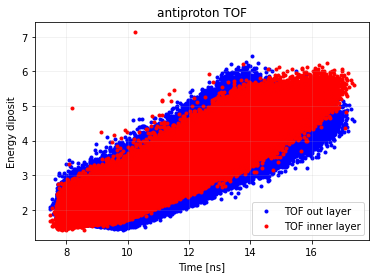

In [11]:
data = []
event = []
identical = []

"""
Read data from total data file
--------------------
"""
print("Reading data ...")
data = pd.read_table("~/CloudDocuments/Documents/GitHub/GRAMS/sensitivity/data/TOF_data/TOF_anti_proton_1e7_0_500_45_4_10.txt")    #input file
#data = pd.read_table("/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/TOF_anti_proton_1e4_0_500_45_4.dat")

"""
modification
"""
print("Modifing data ...")
for i in range(len(data.iloc[:,0])):
    if(0 <= data.iloc[i,2] <= 1):
        event.append(list(data.iloc[i,:]))
    print("Modifing process:"+str(int(100*i/len(data.iloc[:,0])))+"%", end='\r')
event = np.array(event)
print("\n finished!")

"""
recognize the data file length distribution
"""

print("\n Recognize events ...")
s = 0
for s in range(len(event[:,1])-1):
    if(int(event[s,0]) != int(event[s+1,0])):
        identical.append(s+1)
    print("Recognizing process:"+str(int(100*s/len(event[:,0])))+"%", end='\r')
    #time.sleep(0.001)
selection = np.split(event, identical)
print("Recognizing process finished!\n")
identical.append(len(event))

TOF_out_pbar_E = []
TOF_out_pbar_T = []
TOF_in_pbar_E = []
TOF_in_pbar_T = []
index = []

for i in range(1, len(selection)-1, 1):
    tempout = 0
    tempin = 0
    """
    for j in range(selection[i].shape[0]):
        if(selection[i][j][6] == 'LAr' and selection[i][j][3] == '-2212'):
            for m in range(selection[i].shape[0]):
                if(selection[i][m][5] == '-11000' or selection[i][m][5] == '-11001' or selection[i][m][5] == '-11002' or selection[i][m][5] == '-11003' or selection[i][m][5] == '-11004' or selection[i][m][5] == '-11005' and selection[i][m][3] == '-2212'):
                #if(selection[i][m][5] == '-11004' and selection[i][m][3] == '-2212'):
                    tempin = tempin + float(selection[i][m][9])
                #if(selection[i][m][5] == '-10000' or selection[i][m][5] == '-10001' or selection[i][m][5] == '-10002' or selection[i][m][5] == '-10003' or selection[i][m][5] == '-10004' or selection[i][m][5] == '-10005' and selection[i][m][3] == '-2212'):
                elif(selection[i][m][5] == '-10005' and selection[i][m][3] == '-2212'):
                    tempout = tempout + float(selection[i][m][9])
            TOF_out_pbar_E.append(tempout)
            TOF_in_pbar_E.append(tempin)
            break
    """
    for k in range(selection[i].shape[0]):
        if(selection[i][k][6] == 'LAr' and selection[i][k][3] == '-2212'):
            for m in range(k):
                if(selection[i][m][5] == '-11000' or selection[i][m][5] == '-11001' or selection[i][m][5] == '-11002' or selection[i][m][5] == '-11003' or selection[i][m][5] == '-11004' or selection[i][m][5] == '-11005' and selection[i][m][3] == '-2212'):
                #if(selection[i][m][5] == '-11004' and selection[i][m][3] == '-2212'):
                    tempin = tempin + float(selection[i][m][9])
                #if(selection[i][m][5] == '-10000' or selection[i][m][5] == '-10001' or selection[i][m][5] == '-10002' or selection[i][m][5] == '-10003' or selection[i][m][5] == '-10004' or selection[i][m][5] == '-10005' and selection[i][m][3] == '-2212'):
                if(selection[i][m][5] == '-10000' or selection[i][m][5] == '-10001' or selection[i][m][5] == '-10002' or selection[i][m][5] == '-10003' or selection[i][m][5] == '-10004' or selection[i][m][5] == '-10005' and selection[i][m][3] == '-2212'):
                    tempout = tempout + float(selection[i][m][9])
            if(tempin != 0 and tempout != 0):
                TOF_out_pbar_E.append(tempout)
                TOF_in_pbar_E.append(tempin)
                index.append(selection[i][k][0])
            for o in range(k):
                if(selection[i][o][5] == '-11000' or selection[i][o][5] == '-11001' or selection[i][o][5] == '-11002' or selection[i][o][5] == '-11003' or selection[i][o][5] == '-11004' or selection[i][o][5] == '-11005' and selection[i][o][3] == '-2212'):
#                if(selection[i][o][5] == '-11000' or selection[i][o][5] == '-11005' and selection[i][o][3] == '-2212'):
                    TOF_in_pbar_T.append(selection[i][o][7])
                    break
            for p in range(k):
                if(selection[i][p][5] == '-10000' or selection[i][p][5] == '-10001' or selection[i][p][5] == '-10002' or selection[i][p][5] == '-10003' or selection[i][p][5] == '-10004' or selection[i][p][5] == '-10005' and selection[i][p][3] == '-2212'):
#                if(selection[i][p][5] == '-10000' or selection[i][p][5] == '-10005' and selection[i][p][3] == '-2212'):
                    TOF_out_pbar_T.append(selection[i][p][7])
                    break
            theta = np.arctan((float(selection[i][p][18])-float(selection[i][k][18]))/np.sqrt((float(selection[i][p][17])-float(selection[i][k][17])) ** 2 + (float(selection[i][p][16])-float(selection[i][k][16])) ** 2))
            theta0 = np.arctan((210 - float(selection[i][0][18]))/np.sqrt((float(selection[i][0][17])-0) ** 2 + (float(selection[i][0][16])-210) ** 2))
            if(theta < theta0 - 4 * 0.0174532925 or theta > theta0 + 4 * 0.0174532925 and tempin != 0 and tempout != 0):
                TOF_in_pbar_T.pop()
                TOF_out_pbar_T.pop()
                TOF_out_pbar_E.pop()
                TOF_in_pbar_E.pop() 
                index.pop()
            break
    print("TOF data process:"+str(int(100*i/len(selection)))+"%", end='\r')

print("\n identification:finished!")

#dE_pbar = array([float(i) for i in TOF_out_pbar_E]) - array([float(i) for i in TOF_in_pbar_E])
time_pbar = array([float(i) for i in TOF_in_pbar_T]) - array([float(i) for i in TOF_out_pbar_T])
dEOut_pbar = array([float(i) for i in TOF_out_pbar_E])
dEIn_pbar = array([float(i) for i in TOF_in_pbar_E])
#plt.scatter(time_pbar, dE_pbar)
anti_proton = np.array([dEOut_pbar, dEIn_pbar, time_pbar]).transpose()
plt.scatter(time_pbar, dEOut_pbar, marker = '.', color = 'b', label = 'TOF out layer')
plt.scatter(time_pbar, dEIn_pbar,marker = '.', color = 'r', label = 'TOF inner layer')
plt.title('antiproton TOF')
plt.xlabel('Time [ns]')
plt.ylabel('Energy diposit')
plt.legend(loc='lower right')
#plt.axis([0, 20, 0, 10])
plt.grid(alpha = 0.2)
#np.savetxt('/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/TOF_anti_proton_1e7_0_500_45_4_result.txt', anti_proton, delimiter = '\t ', fmt='%.6s')
with open("/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/TOF_anti_proton_1e7_0_500_45_4_result.txt", "ab") as f:    #input file
#with open("/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/test.txt", "ab") as f:    #test run
    #f.write(b"\n")
    np.savetxt(f, anti_proton)
print("finished!")

Reading data ...
Modifing data ...
Modifing process:99%
 finished!

 Recognize events ...
Recognizing process finished!

TOF data process:99%
 identification:finished!
finished!


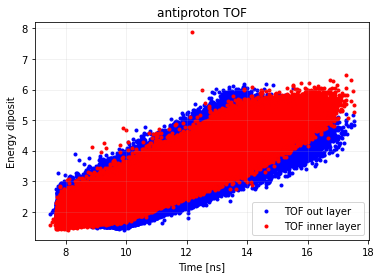

In [12]:
data = []
event = []
identical = []

"""
Read data from total data file
--------------------
"""
print("Reading data ...")
data = pd.read_table("~/CloudDocuments/Documents/GitHub/GRAMS/sensitivity/data/TOF_data/TOF_anti_proton_1e7_0_500_45_4_11.txt")    #input file
#data = pd.read_table("/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/TOF_anti_proton_1e4_0_500_45_4.dat")

"""
modification
"""
print("Modifing data ...")
for i in range(len(data.iloc[:,0])):
    if(0 <= data.iloc[i,2] <= 1):
        event.append(list(data.iloc[i,:]))
    print("Modifing process:"+str(int(100*i/len(data.iloc[:,0])))+"%", end='\r')
event = np.array(event)
print("\n finished!")

"""
recognize the data file length distribution
"""

print("\n Recognize events ...")
s = 0
for s in range(len(event[:,1])-1):
    if(int(event[s,0]) != int(event[s+1,0])):
        identical.append(s+1)
    print("Recognizing process:"+str(int(100*s/len(event[:,0])))+"%", end='\r')
    #time.sleep(0.001)
selection = np.split(event, identical)
print("Recognizing process finished!\n")
identical.append(len(event))

TOF_out_pbar_E = []
TOF_out_pbar_T = []
TOF_in_pbar_E = []
TOF_in_pbar_T = []
index = []

for i in range(1, len(selection)-1, 1):
    tempout = 0
    tempin = 0
    """
    for j in range(selection[i].shape[0]):
        if(selection[i][j][6] == 'LAr' and selection[i][j][3] == '-2212'):
            for m in range(selection[i].shape[0]):
                if(selection[i][m][5] == '-11000' or selection[i][m][5] == '-11001' or selection[i][m][5] == '-11002' or selection[i][m][5] == '-11003' or selection[i][m][5] == '-11004' or selection[i][m][5] == '-11005' and selection[i][m][3] == '-2212'):
                #if(selection[i][m][5] == '-11004' and selection[i][m][3] == '-2212'):
                    tempin = tempin + float(selection[i][m][9])
                #if(selection[i][m][5] == '-10000' or selection[i][m][5] == '-10001' or selection[i][m][5] == '-10002' or selection[i][m][5] == '-10003' or selection[i][m][5] == '-10004' or selection[i][m][5] == '-10005' and selection[i][m][3] == '-2212'):
                elif(selection[i][m][5] == '-10005' and selection[i][m][3] == '-2212'):
                    tempout = tempout + float(selection[i][m][9])
            TOF_out_pbar_E.append(tempout)
            TOF_in_pbar_E.append(tempin)
            break
    """
    for k in range(selection[i].shape[0]):
        if(selection[i][k][6] == 'LAr' and selection[i][k][3] == '-2212'):
            for m in range(k):
                if(selection[i][m][5] == '-11000' or selection[i][m][5] == '-11001' or selection[i][m][5] == '-11002' or selection[i][m][5] == '-11003' or selection[i][m][5] == '-11004' or selection[i][m][5] == '-11005' and selection[i][m][3] == '-2212'):
                #if(selection[i][m][5] == '-11004' and selection[i][m][3] == '-2212'):
                    tempin = tempin + float(selection[i][m][9])
                #if(selection[i][m][5] == '-10000' or selection[i][m][5] == '-10001' or selection[i][m][5] == '-10002' or selection[i][m][5] == '-10003' or selection[i][m][5] == '-10004' or selection[i][m][5] == '-10005' and selection[i][m][3] == '-2212'):
                if(selection[i][m][5] == '-10000' or selection[i][m][5] == '-10001' or selection[i][m][5] == '-10002' or selection[i][m][5] == '-10003' or selection[i][m][5] == '-10004' or selection[i][m][5] == '-10005' and selection[i][m][3] == '-2212'):
                    tempout = tempout + float(selection[i][m][9])
            if(tempin != 0 and tempout != 0):
                TOF_out_pbar_E.append(tempout)
                TOF_in_pbar_E.append(tempin)
                index.append(selection[i][k][0])
            for o in range(k):
                if(selection[i][o][5] == '-11000' or selection[i][o][5] == '-11001' or selection[i][o][5] == '-11002' or selection[i][o][5] == '-11003' or selection[i][o][5] == '-11004' or selection[i][o][5] == '-11005' and selection[i][o][3] == '-2212'):
#                if(selection[i][o][5] == '-11000' or selection[i][o][5] == '-11005' and selection[i][o][3] == '-2212'):
                    TOF_in_pbar_T.append(selection[i][o][7])
                    break
            for p in range(k):
                if(selection[i][p][5] == '-10000' or selection[i][p][5] == '-10001' or selection[i][p][5] == '-10002' or selection[i][p][5] == '-10003' or selection[i][p][5] == '-10004' or selection[i][p][5] == '-10005' and selection[i][p][3] == '-2212'):
#                if(selection[i][p][5] == '-10000' or selection[i][p][5] == '-10005' and selection[i][p][3] == '-2212'):
                    TOF_out_pbar_T.append(selection[i][p][7])
                    break
            theta = np.arctan((float(selection[i][p][18])-float(selection[i][k][18]))/np.sqrt((float(selection[i][p][17])-float(selection[i][k][17])) ** 2 + (float(selection[i][p][16])-float(selection[i][k][16])) ** 2))
            theta0 = np.arctan((210 - float(selection[i][0][18]))/np.sqrt((float(selection[i][0][17])-0) ** 2 + (float(selection[i][0][16])-210) ** 2))
            if(theta < theta0 - 4 * 0.0174532925 or theta > theta0 + 4 * 0.0174532925 and tempin != 0 and tempout != 0):
                TOF_in_pbar_T.pop()
                TOF_out_pbar_T.pop()
                TOF_out_pbar_E.pop()
                TOF_in_pbar_E.pop() 
                index.pop()
            break
    print("TOF data process:"+str(int(100*i/len(selection)))+"%", end='\r')

print("\n identification:finished!")

#dE_pbar = array([float(i) for i in TOF_out_pbar_E]) - array([float(i) for i in TOF_in_pbar_E])
time_pbar = array([float(i) for i in TOF_in_pbar_T]) - array([float(i) for i in TOF_out_pbar_T])
dEOut_pbar = array([float(i) for i in TOF_out_pbar_E])
dEIn_pbar = array([float(i) for i in TOF_in_pbar_E])
#plt.scatter(time_pbar, dE_pbar)
anti_proton = np.array([dEOut_pbar, dEIn_pbar, time_pbar]).transpose()
plt.scatter(time_pbar, dEOut_pbar, marker = '.', color = 'b', label = 'TOF out layer')
plt.scatter(time_pbar, dEIn_pbar,marker = '.', color = 'r', label = 'TOF inner layer')
plt.title('antiproton TOF')
plt.xlabel('Time [ns]')
plt.ylabel('Energy diposit')
plt.legend(loc='lower right')
#plt.axis([0, 20, 0, 10])
plt.grid(alpha = 0.2)
#np.savetxt('/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/TOF_anti_proton_1e7_0_500_45_4_result.txt', anti_proton, delimiter = '\t ', fmt='%.6s')
with open("/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/TOF_anti_proton_1e7_0_500_45_4_result.txt", "ab") as f:    #input file
#with open("/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/test.txt", "ab") as f:    #test run
    #f.write(b"\n")
    np.savetxt(f, anti_proton)
print("finished!")

Reading data ...
Modifing data ...
Modifing process:99%
 finished!

 Recognize events ...
Recognizing process finished!

TOF data process:99%
 identification:finished!
finished!


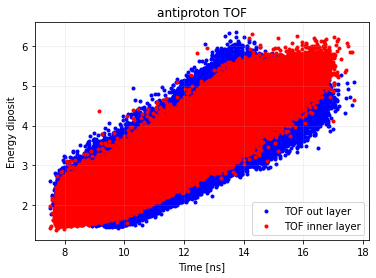

In [13]:
data = []
event = []
identical = []

"""
Read data from total data file
--------------------
"""
print("Reading data ...")
data = pd.read_table("~/CloudDocuments/Documents/GitHub/GRAMS/sensitivity/data/TOF_data/TOF_anti_proton_1e7_0_500_45_4_12.txt")    #input file
#data = pd.read_table("/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/TOF_anti_proton_1e4_0_500_45_4.dat")

"""
modification
"""
print("Modifing data ...")
for i in range(len(data.iloc[:,0])):
    if(0 <= data.iloc[i,2] <= 1):
        event.append(list(data.iloc[i,:]))
    print("Modifing process:"+str(int(100*i/len(data.iloc[:,0])))+"%", end='\r')
event = np.array(event)
print("\n finished!")

"""
recognize the data file length distribution
"""

print("\n Recognize events ...")
s = 0
for s in range(len(event[:,1])-1):
    if(int(event[s,0]) != int(event[s+1,0])):
        identical.append(s+1)
    print("Recognizing process:"+str(int(100*s/len(event[:,0])))+"%", end='\r')
    #time.sleep(0.001)
selection = np.split(event, identical)
print("Recognizing process finished!\n")
identical.append(len(event))

TOF_out_pbar_E = []
TOF_out_pbar_T = []
TOF_in_pbar_E = []
TOF_in_pbar_T = []
index = []

for i in range(1, len(selection)-1, 1):
    tempout = 0
    tempin = 0
    """
    for j in range(selection[i].shape[0]):
        if(selection[i][j][6] == 'LAr' and selection[i][j][3] == '-2212'):
            for m in range(selection[i].shape[0]):
                if(selection[i][m][5] == '-11000' or selection[i][m][5] == '-11001' or selection[i][m][5] == '-11002' or selection[i][m][5] == '-11003' or selection[i][m][5] == '-11004' or selection[i][m][5] == '-11005' and selection[i][m][3] == '-2212'):
                #if(selection[i][m][5] == '-11004' and selection[i][m][3] == '-2212'):
                    tempin = tempin + float(selection[i][m][9])
                #if(selection[i][m][5] == '-10000' or selection[i][m][5] == '-10001' or selection[i][m][5] == '-10002' or selection[i][m][5] == '-10003' or selection[i][m][5] == '-10004' or selection[i][m][5] == '-10005' and selection[i][m][3] == '-2212'):
                elif(selection[i][m][5] == '-10005' and selection[i][m][3] == '-2212'):
                    tempout = tempout + float(selection[i][m][9])
            TOF_out_pbar_E.append(tempout)
            TOF_in_pbar_E.append(tempin)
            break
    """
    for k in range(selection[i].shape[0]):
        if(selection[i][k][6] == 'LAr' and selection[i][k][3] == '-2212'):
            for m in range(k):
                if(selection[i][m][5] == '-11000' or selection[i][m][5] == '-11001' or selection[i][m][5] == '-11002' or selection[i][m][5] == '-11003' or selection[i][m][5] == '-11004' or selection[i][m][5] == '-11005' and selection[i][m][3] == '-2212'):
                #if(selection[i][m][5] == '-11004' and selection[i][m][3] == '-2212'):
                    tempin = tempin + float(selection[i][m][9])
                #if(selection[i][m][5] == '-10000' or selection[i][m][5] == '-10001' or selection[i][m][5] == '-10002' or selection[i][m][5] == '-10003' or selection[i][m][5] == '-10004' or selection[i][m][5] == '-10005' and selection[i][m][3] == '-2212'):
                if(selection[i][m][5] == '-10000' or selection[i][m][5] == '-10001' or selection[i][m][5] == '-10002' or selection[i][m][5] == '-10003' or selection[i][m][5] == '-10004' or selection[i][m][5] == '-10005' and selection[i][m][3] == '-2212'):
                    tempout = tempout + float(selection[i][m][9])
            if(tempin != 0 and tempout != 0):
                TOF_out_pbar_E.append(tempout)
                TOF_in_pbar_E.append(tempin)
                index.append(selection[i][k][0])
            for o in range(k):
                if(selection[i][o][5] == '-11000' or selection[i][o][5] == '-11001' or selection[i][o][5] == '-11002' or selection[i][o][5] == '-11003' or selection[i][o][5] == '-11004' or selection[i][o][5] == '-11005' and selection[i][o][3] == '-2212'):
#                if(selection[i][o][5] == '-11000' or selection[i][o][5] == '-11005' and selection[i][o][3] == '-2212'):
                    TOF_in_pbar_T.append(selection[i][o][7])
                    break
            for p in range(k):
                if(selection[i][p][5] == '-10000' or selection[i][p][5] == '-10001' or selection[i][p][5] == '-10002' or selection[i][p][5] == '-10003' or selection[i][p][5] == '-10004' or selection[i][p][5] == '-10005' and selection[i][p][3] == '-2212'):
#                if(selection[i][p][5] == '-10000' or selection[i][p][5] == '-10005' and selection[i][p][3] == '-2212'):
                    TOF_out_pbar_T.append(selection[i][p][7])
                    break
            theta = np.arctan((float(selection[i][p][18])-float(selection[i][k][18]))/np.sqrt((float(selection[i][p][17])-float(selection[i][k][17])) ** 2 + (float(selection[i][p][16])-float(selection[i][k][16])) ** 2))
            theta0 = np.arctan((210 - float(selection[i][0][18]))/np.sqrt((float(selection[i][0][17])-0) ** 2 + (float(selection[i][0][16])-210) ** 2))
            if(theta < theta0 - 4 * 0.0174532925 or theta > theta0 + 4 * 0.0174532925 and tempin != 0 and tempout != 0):
                TOF_in_pbar_T.pop()
                TOF_out_pbar_T.pop()
                TOF_out_pbar_E.pop()
                TOF_in_pbar_E.pop() 
                index.pop()
            break
    print("TOF data process:"+str(int(100*i/len(selection)))+"%", end='\r')

print("\n identification:finished!")

#dE_pbar = array([float(i) for i in TOF_out_pbar_E]) - array([float(i) for i in TOF_in_pbar_E])
time_pbar = array([float(i) for i in TOF_in_pbar_T]) - array([float(i) for i in TOF_out_pbar_T])
dEOut_pbar = array([float(i) for i in TOF_out_pbar_E])
dEIn_pbar = array([float(i) for i in TOF_in_pbar_E])
#plt.scatter(time_pbar, dE_pbar)
anti_proton = np.array([dEOut_pbar, dEIn_pbar, time_pbar]).transpose()
plt.scatter(time_pbar, dEOut_pbar, marker = '.', color = 'b', label = 'TOF out layer')
plt.scatter(time_pbar, dEIn_pbar,marker = '.', color = 'r', label = 'TOF inner layer')
plt.title('antiproton TOF')
plt.xlabel('Time [ns]')
plt.ylabel('Energy diposit')
plt.legend(loc='lower right')
#plt.axis([0, 20, 0, 10])
plt.grid(alpha = 0.2)
#np.savetxt('/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/TOF_anti_proton_1e7_0_500_45_4_result.txt', anti_proton, delimiter = '\t ', fmt='%.6s')
with open("/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/TOF_anti_proton_1e7_0_500_45_4_result.txt", "ab") as f:    #input file
#with open("/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/test.txt", "ab") as f:    #test run
    #f.write(b"\n")
    np.savetxt(f, anti_proton)
print("finished!")

Reading data ...
Modifing data ...
Modifing process:99%
 finished!

 Recognize events ...
Recognizing process finished!

TOF data process:99%
 identification:finished!
finished!


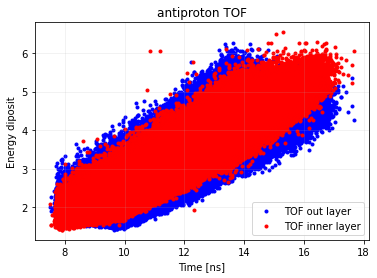

In [14]:
data = []
event = []
identical = []

"""
Read data from total data file
--------------------
"""
print("Reading data ...")
data = pd.read_table("~/CloudDocuments/Documents/GitHub/GRAMS/sensitivity/data/TOF_data/TOF_anti_proton_1e7_0_500_45_4_13.txt")    #input file
#data = pd.read_table("/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/TOF_anti_proton_1e4_0_500_45_4.dat")

"""
modification
"""
print("Modifing data ...")
for i in range(len(data.iloc[:,0])):
    if(0 <= data.iloc[i,2] <= 1):
        event.append(list(data.iloc[i,:]))
    print("Modifing process:"+str(int(100*i/len(data.iloc[:,0])))+"%", end='\r')
event = np.array(event)
print("\n finished!")

"""
recognize the data file length distribution
"""

print("\n Recognize events ...")
s = 0
for s in range(len(event[:,1])-1):
    if(int(event[s,0]) != int(event[s+1,0])):
        identical.append(s+1)
    print("Recognizing process:"+str(int(100*s/len(event[:,0])))+"%", end='\r')
    #time.sleep(0.001)
selection = np.split(event, identical)
print("Recognizing process finished!\n")
identical.append(len(event))

TOF_out_pbar_E = []
TOF_out_pbar_T = []
TOF_in_pbar_E = []
TOF_in_pbar_T = []
index = []

for i in range(1, len(selection)-1, 1):
    tempout = 0
    tempin = 0
    """
    for j in range(selection[i].shape[0]):
        if(selection[i][j][6] == 'LAr' and selection[i][j][3] == '-2212'):
            for m in range(selection[i].shape[0]):
                if(selection[i][m][5] == '-11000' or selection[i][m][5] == '-11001' or selection[i][m][5] == '-11002' or selection[i][m][5] == '-11003' or selection[i][m][5] == '-11004' or selection[i][m][5] == '-11005' and selection[i][m][3] == '-2212'):
                #if(selection[i][m][5] == '-11004' and selection[i][m][3] == '-2212'):
                    tempin = tempin + float(selection[i][m][9])
                #if(selection[i][m][5] == '-10000' or selection[i][m][5] == '-10001' or selection[i][m][5] == '-10002' or selection[i][m][5] == '-10003' or selection[i][m][5] == '-10004' or selection[i][m][5] == '-10005' and selection[i][m][3] == '-2212'):
                elif(selection[i][m][5] == '-10005' and selection[i][m][3] == '-2212'):
                    tempout = tempout + float(selection[i][m][9])
            TOF_out_pbar_E.append(tempout)
            TOF_in_pbar_E.append(tempin)
            break
    """
    for k in range(selection[i].shape[0]):
        if(selection[i][k][6] == 'LAr' and selection[i][k][3] == '-2212'):
            for m in range(k):
                if(selection[i][m][5] == '-11000' or selection[i][m][5] == '-11001' or selection[i][m][5] == '-11002' or selection[i][m][5] == '-11003' or selection[i][m][5] == '-11004' or selection[i][m][5] == '-11005' and selection[i][m][3] == '-2212'):
                #if(selection[i][m][5] == '-11004' and selection[i][m][3] == '-2212'):
                    tempin = tempin + float(selection[i][m][9])
                #if(selection[i][m][5] == '-10000' or selection[i][m][5] == '-10001' or selection[i][m][5] == '-10002' or selection[i][m][5] == '-10003' or selection[i][m][5] == '-10004' or selection[i][m][5] == '-10005' and selection[i][m][3] == '-2212'):
                if(selection[i][m][5] == '-10000' or selection[i][m][5] == '-10001' or selection[i][m][5] == '-10002' or selection[i][m][5] == '-10003' or selection[i][m][5] == '-10004' or selection[i][m][5] == '-10005' and selection[i][m][3] == '-2212'):
                    tempout = tempout + float(selection[i][m][9])
            if(tempin != 0 and tempout != 0):
                TOF_out_pbar_E.append(tempout)
                TOF_in_pbar_E.append(tempin)
                index.append(selection[i][k][0])
            for o in range(k):
                if(selection[i][o][5] == '-11000' or selection[i][o][5] == '-11001' or selection[i][o][5] == '-11002' or selection[i][o][5] == '-11003' or selection[i][o][5] == '-11004' or selection[i][o][5] == '-11005' and selection[i][o][3] == '-2212'):
#                if(selection[i][o][5] == '-11000' or selection[i][o][5] == '-11005' and selection[i][o][3] == '-2212'):
                    TOF_in_pbar_T.append(selection[i][o][7])
                    break
            for p in range(k):
                if(selection[i][p][5] == '-10000' or selection[i][p][5] == '-10001' or selection[i][p][5] == '-10002' or selection[i][p][5] == '-10003' or selection[i][p][5] == '-10004' or selection[i][p][5] == '-10005' and selection[i][p][3] == '-2212'):
#                if(selection[i][p][5] == '-10000' or selection[i][p][5] == '-10005' and selection[i][p][3] == '-2212'):
                    TOF_out_pbar_T.append(selection[i][p][7])
                    break
            theta = np.arctan((float(selection[i][p][18])-float(selection[i][k][18]))/np.sqrt((float(selection[i][p][17])-float(selection[i][k][17])) ** 2 + (float(selection[i][p][16])-float(selection[i][k][16])) ** 2))
            theta0 = np.arctan((210 - float(selection[i][0][18]))/np.sqrt((float(selection[i][0][17])-0) ** 2 + (float(selection[i][0][16])-210) ** 2))
            if(theta < theta0 - 4 * 0.0174532925 or theta > theta0 + 4 * 0.0174532925 and tempin != 0 and tempout != 0):
                TOF_in_pbar_T.pop()
                TOF_out_pbar_T.pop()
                TOF_out_pbar_E.pop()
                TOF_in_pbar_E.pop() 
                index.pop()
            break
    print("TOF data process:"+str(int(100*i/len(selection)))+"%", end='\r')

print("\n identification:finished!")

#dE_pbar = array([float(i) for i in TOF_out_pbar_E]) - array([float(i) for i in TOF_in_pbar_E])
time_pbar = array([float(i) for i in TOF_in_pbar_T]) - array([float(i) for i in TOF_out_pbar_T])
dEOut_pbar = array([float(i) for i in TOF_out_pbar_E])
dEIn_pbar = array([float(i) for i in TOF_in_pbar_E])
#plt.scatter(time_pbar, dE_pbar)
anti_proton = np.array([dEOut_pbar, dEIn_pbar, time_pbar]).transpose()
plt.scatter(time_pbar, dEOut_pbar, marker = '.', color = 'b', label = 'TOF out layer')
plt.scatter(time_pbar, dEIn_pbar,marker = '.', color = 'r', label = 'TOF inner layer')
plt.title('antiproton TOF')
plt.xlabel('Time [ns]')
plt.ylabel('Energy diposit')
plt.legend(loc='lower right')
#plt.axis([0, 20, 0, 10])
plt.grid(alpha = 0.2)
#np.savetxt('/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/TOF_anti_proton_1e7_0_500_45_4_result.txt', anti_proton, delimiter = '\t ', fmt='%.6s')
with open("/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/TOF_anti_proton_1e7_0_500_45_4_result.txt", "ab") as f:    #input file
#with open("/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/test.txt", "ab") as f:    #test run
    #f.write(b"\n")
    np.savetxt(f, anti_proton)
print("finished!")

Reading data ...
Modifing data ...
Modifing process:99%
 finished!

 Recognize events ...
Recognizing process finished!

TOF data process:99%
 identification:finished!
finished!


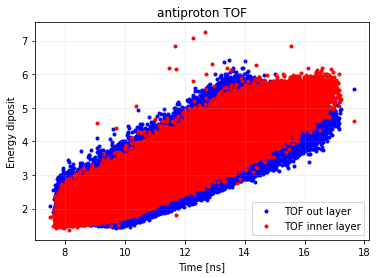

In [15]:
data = []
event = []
identical = []

"""
Read data from total data file
--------------------
"""
print("Reading data ...")
data = pd.read_table("~/CloudDocuments/Documents/GitHub/GRAMS/sensitivity/data/TOF_data/TOF_anti_proton_1e7_0_500_45_4_14.txt")    #input file
#data = pd.read_table("/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/TOF_anti_proton_1e4_0_500_45_4.dat")

"""
modification
"""
print("Modifing data ...")
for i in range(len(data.iloc[:,0])):
    if(0 <= data.iloc[i,2] <= 1):
        event.append(list(data.iloc[i,:]))
    print("Modifing process:"+str(int(100*i/len(data.iloc[:,0])))+"%", end='\r')
event = np.array(event)
print("\n finished!")

"""
recognize the data file length distribution
"""

print("\n Recognize events ...")
s = 0
for s in range(len(event[:,1])-1):
    if(int(event[s,0]) != int(event[s+1,0])):
        identical.append(s+1)
    print("Recognizing process:"+str(int(100*s/len(event[:,0])))+"%", end='\r')
    #time.sleep(0.001)
selection = np.split(event, identical)
print("Recognizing process finished!\n")
identical.append(len(event))

TOF_out_pbar_E = []
TOF_out_pbar_T = []
TOF_in_pbar_E = []
TOF_in_pbar_T = []
index = []

for i in range(1, len(selection)-1, 1):
    tempout = 0
    tempin = 0
    """
    for j in range(selection[i].shape[0]):
        if(selection[i][j][6] == 'LAr' and selection[i][j][3] == '-2212'):
            for m in range(selection[i].shape[0]):
                if(selection[i][m][5] == '-11000' or selection[i][m][5] == '-11001' or selection[i][m][5] == '-11002' or selection[i][m][5] == '-11003' or selection[i][m][5] == '-11004' or selection[i][m][5] == '-11005' and selection[i][m][3] == '-2212'):
                #if(selection[i][m][5] == '-11004' and selection[i][m][3] == '-2212'):
                    tempin = tempin + float(selection[i][m][9])
                #if(selection[i][m][5] == '-10000' or selection[i][m][5] == '-10001' or selection[i][m][5] == '-10002' or selection[i][m][5] == '-10003' or selection[i][m][5] == '-10004' or selection[i][m][5] == '-10005' and selection[i][m][3] == '-2212'):
                elif(selection[i][m][5] == '-10005' and selection[i][m][3] == '-2212'):
                    tempout = tempout + float(selection[i][m][9])
            TOF_out_pbar_E.append(tempout)
            TOF_in_pbar_E.append(tempin)
            break
    """
    for k in range(selection[i].shape[0]):
        if(selection[i][k][6] == 'LAr' and selection[i][k][3] == '-2212'):
            for m in range(k):
                if(selection[i][m][5] == '-11000' or selection[i][m][5] == '-11001' or selection[i][m][5] == '-11002' or selection[i][m][5] == '-11003' or selection[i][m][5] == '-11004' or selection[i][m][5] == '-11005' and selection[i][m][3] == '-2212'):
                #if(selection[i][m][5] == '-11004' and selection[i][m][3] == '-2212'):
                    tempin = tempin + float(selection[i][m][9])
                #if(selection[i][m][5] == '-10000' or selection[i][m][5] == '-10001' or selection[i][m][5] == '-10002' or selection[i][m][5] == '-10003' or selection[i][m][5] == '-10004' or selection[i][m][5] == '-10005' and selection[i][m][3] == '-2212'):
                if(selection[i][m][5] == '-10000' or selection[i][m][5] == '-10001' or selection[i][m][5] == '-10002' or selection[i][m][5] == '-10003' or selection[i][m][5] == '-10004' or selection[i][m][5] == '-10005' and selection[i][m][3] == '-2212'):
                    tempout = tempout + float(selection[i][m][9])
            if(tempin != 0 and tempout != 0):
                TOF_out_pbar_E.append(tempout)
                TOF_in_pbar_E.append(tempin)
                index.append(selection[i][k][0])
            for o in range(k):
                if(selection[i][o][5] == '-11000' or selection[i][o][5] == '-11001' or selection[i][o][5] == '-11002' or selection[i][o][5] == '-11003' or selection[i][o][5] == '-11004' or selection[i][o][5] == '-11005' and selection[i][o][3] == '-2212'):
#                if(selection[i][o][5] == '-11000' or selection[i][o][5] == '-11005' and selection[i][o][3] == '-2212'):
                    TOF_in_pbar_T.append(selection[i][o][7])
                    break
            for p in range(k):
                if(selection[i][p][5] == '-10000' or selection[i][p][5] == '-10001' or selection[i][p][5] == '-10002' or selection[i][p][5] == '-10003' or selection[i][p][5] == '-10004' or selection[i][p][5] == '-10005' and selection[i][p][3] == '-2212'):
#                if(selection[i][p][5] == '-10000' or selection[i][p][5] == '-10005' and selection[i][p][3] == '-2212'):
                    TOF_out_pbar_T.append(selection[i][p][7])
                    break
            theta = np.arctan((float(selection[i][p][18])-float(selection[i][k][18]))/np.sqrt((float(selection[i][p][17])-float(selection[i][k][17])) ** 2 + (float(selection[i][p][16])-float(selection[i][k][16])) ** 2))
            theta0 = np.arctan((210 - float(selection[i][0][18]))/np.sqrt((float(selection[i][0][17])-0) ** 2 + (float(selection[i][0][16])-210) ** 2))
            if(theta < theta0 - 4 * 0.0174532925 or theta > theta0 + 4 * 0.0174532925 and tempin != 0 and tempout != 0):
                TOF_in_pbar_T.pop()
                TOF_out_pbar_T.pop()
                TOF_out_pbar_E.pop()
                TOF_in_pbar_E.pop() 
                index.pop()
            break
    print("TOF data process:"+str(int(100*i/len(selection)))+"%", end='\r')

print("\n identification:finished!")

#dE_pbar = array([float(i) for i in TOF_out_pbar_E]) - array([float(i) for i in TOF_in_pbar_E])
time_pbar = array([float(i) for i in TOF_in_pbar_T]) - array([float(i) for i in TOF_out_pbar_T])
dEOut_pbar = array([float(i) for i in TOF_out_pbar_E])
dEIn_pbar = array([float(i) for i in TOF_in_pbar_E])
#plt.scatter(time_pbar, dE_pbar)
anti_proton = np.array([dEOut_pbar, dEIn_pbar, time_pbar]).transpose()
plt.scatter(time_pbar, dEOut_pbar, marker = '.', color = 'b', label = 'TOF out layer')
plt.scatter(time_pbar, dEIn_pbar,marker = '.', color = 'r', label = 'TOF inner layer')
plt.title('antiproton TOF')
plt.xlabel('Time [ns]')
plt.ylabel('Energy diposit')
plt.legend(loc='lower right')
#plt.axis([0, 20, 0, 10])
plt.grid(alpha = 0.2)
#np.savetxt('/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/TOF_anti_proton_1e7_0_500_45_4_result.txt', anti_proton, delimiter = '\t ', fmt='%.6s')
with open("/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/TOF_anti_proton_1e7_0_500_45_4_result.txt", "ab") as f:    #input file
#with open("/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/test.txt", "ab") as f:    #test run
    #f.write(b"\n")
    np.savetxt(f, anti_proton)
print("finished!")

Reading data ...
Modifing data ...
Modifing process:99%
 finished!

 Recognize events ...
Recognizing process finished!

TOF data process:99%
 identification:finished!
finished!


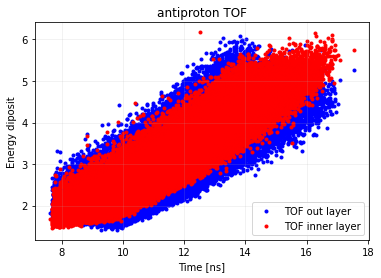

In [16]:
data = []
event = []
identical = []

"""
Read data from total data file
--------------------
"""
print("Reading data ...")
data = pd.read_table("~/CloudDocuments/Documents/GitHub/GRAMS/sensitivity/data/TOF_data/TOF_anti_proton_1e7_0_500_45_4_15.txt")    #input file
#data = pd.read_table("/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/TOF_anti_proton_1e4_0_500_45_4.dat")

"""
modification
"""
print("Modifing data ...")
for i in range(len(data.iloc[:,0])):
    if(0 <= data.iloc[i,2] <= 1):
        event.append(list(data.iloc[i,:]))
    print("Modifing process:"+str(int(100*i/len(data.iloc[:,0])))+"%", end='\r')
event = np.array(event)
print("\n finished!")

"""
recognize the data file length distribution
"""

print("\n Recognize events ...")
s = 0
for s in range(len(event[:,1])-1):
    if(int(event[s,0]) != int(event[s+1,0])):
        identical.append(s+1)
    print("Recognizing process:"+str(int(100*s/len(event[:,0])))+"%", end='\r')
    #time.sleep(0.001)
selection = np.split(event, identical)
print("Recognizing process finished!\n")
identical.append(len(event))

TOF_out_pbar_E = []
TOF_out_pbar_T = []
TOF_in_pbar_E = []
TOF_in_pbar_T = []
index = []

for i in range(1, len(selection)-1, 1):
    tempout = 0
    tempin = 0
    """
    for j in range(selection[i].shape[0]):
        if(selection[i][j][6] == 'LAr' and selection[i][j][3] == '-2212'):
            for m in range(selection[i].shape[0]):
                if(selection[i][m][5] == '-11000' or selection[i][m][5] == '-11001' or selection[i][m][5] == '-11002' or selection[i][m][5] == '-11003' or selection[i][m][5] == '-11004' or selection[i][m][5] == '-11005' and selection[i][m][3] == '-2212'):
                #if(selection[i][m][5] == '-11004' and selection[i][m][3] == '-2212'):
                    tempin = tempin + float(selection[i][m][9])
                #if(selection[i][m][5] == '-10000' or selection[i][m][5] == '-10001' or selection[i][m][5] == '-10002' or selection[i][m][5] == '-10003' or selection[i][m][5] == '-10004' or selection[i][m][5] == '-10005' and selection[i][m][3] == '-2212'):
                elif(selection[i][m][5] == '-10005' and selection[i][m][3] == '-2212'):
                    tempout = tempout + float(selection[i][m][9])
            TOF_out_pbar_E.append(tempout)
            TOF_in_pbar_E.append(tempin)
            break
    """
    for k in range(selection[i].shape[0]):
        if(selection[i][k][6] == 'LAr' and selection[i][k][3] == '-2212'):
            for m in range(k):
                if(selection[i][m][5] == '-11000' or selection[i][m][5] == '-11001' or selection[i][m][5] == '-11002' or selection[i][m][5] == '-11003' or selection[i][m][5] == '-11004' or selection[i][m][5] == '-11005' and selection[i][m][3] == '-2212'):
                #if(selection[i][m][5] == '-11004' and selection[i][m][3] == '-2212'):
                    tempin = tempin + float(selection[i][m][9])
                #if(selection[i][m][5] == '-10000' or selection[i][m][5] == '-10001' or selection[i][m][5] == '-10002' or selection[i][m][5] == '-10003' or selection[i][m][5] == '-10004' or selection[i][m][5] == '-10005' and selection[i][m][3] == '-2212'):
                if(selection[i][m][5] == '-10000' or selection[i][m][5] == '-10001' or selection[i][m][5] == '-10002' or selection[i][m][5] == '-10003' or selection[i][m][5] == '-10004' or selection[i][m][5] == '-10005' and selection[i][m][3] == '-2212'):
                    tempout = tempout + float(selection[i][m][9])
            if(tempin != 0 and tempout != 0):
                TOF_out_pbar_E.append(tempout)
                TOF_in_pbar_E.append(tempin)
                index.append(selection[i][k][0])
            for o in range(k):
                if(selection[i][o][5] == '-11000' or selection[i][o][5] == '-11001' or selection[i][o][5] == '-11002' or selection[i][o][5] == '-11003' or selection[i][o][5] == '-11004' or selection[i][o][5] == '-11005' and selection[i][o][3] == '-2212'):
#                if(selection[i][o][5] == '-11000' or selection[i][o][5] == '-11005' and selection[i][o][3] == '-2212'):
                    TOF_in_pbar_T.append(selection[i][o][7])
                    break
            for p in range(k):
                if(selection[i][p][5] == '-10000' or selection[i][p][5] == '-10001' or selection[i][p][5] == '-10002' or selection[i][p][5] == '-10003' or selection[i][p][5] == '-10004' or selection[i][p][5] == '-10005' and selection[i][p][3] == '-2212'):
#                if(selection[i][p][5] == '-10000' or selection[i][p][5] == '-10005' and selection[i][p][3] == '-2212'):
                    TOF_out_pbar_T.append(selection[i][p][7])
                    break
            theta = np.arctan((float(selection[i][p][18])-float(selection[i][k][18]))/np.sqrt((float(selection[i][p][17])-float(selection[i][k][17])) ** 2 + (float(selection[i][p][16])-float(selection[i][k][16])) ** 2))
            theta0 = np.arctan((210 - float(selection[i][0][18]))/np.sqrt((float(selection[i][0][17])-0) ** 2 + (float(selection[i][0][16])-210) ** 2))
            if(theta < theta0 - 4 * 0.0174532925 or theta > theta0 + 4 * 0.0174532925 and tempin != 0 and tempout != 0):
                TOF_in_pbar_T.pop()
                TOF_out_pbar_T.pop()
                TOF_out_pbar_E.pop()
                TOF_in_pbar_E.pop() 
                index.pop()
            break
    print("TOF data process:"+str(int(100*i/len(selection)))+"%", end='\r')

print("\n identification:finished!")

#dE_pbar = array([float(i) for i in TOF_out_pbar_E]) - array([float(i) for i in TOF_in_pbar_E])
time_pbar = array([float(i) for i in TOF_in_pbar_T]) - array([float(i) for i in TOF_out_pbar_T])
dEOut_pbar = array([float(i) for i in TOF_out_pbar_E])
dEIn_pbar = array([float(i) for i in TOF_in_pbar_E])
#plt.scatter(time_pbar, dE_pbar)
anti_proton = np.array([dEOut_pbar, dEIn_pbar, time_pbar]).transpose()
plt.scatter(time_pbar, dEOut_pbar, marker = '.', color = 'b', label = 'TOF out layer')
plt.scatter(time_pbar, dEIn_pbar,marker = '.', color = 'r', label = 'TOF inner layer')
plt.title('antiproton TOF')
plt.xlabel('Time [ns]')
plt.ylabel('Energy diposit')
plt.legend(loc='lower right')
#plt.axis([0, 20, 0, 10])
plt.grid(alpha = 0.2)
#np.savetxt('/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/TOF_anti_proton_1e7_0_500_45_4_result.txt', anti_proton, delimiter = '\t ', fmt='%.6s')
with open("/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/TOF_anti_proton_1e7_0_500_45_4_result.txt", "ab") as f:    #input file
#with open("/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/test.txt", "ab") as f:    #test run
    #f.write(b"\n")
    np.savetxt(f, anti_proton)
print("finished!")